# FYS-STK4155 Project #1 - Regression Analysis

Evaluation of Project number: 1 <br />
Name: Lennart Lehmann (ERASMUS Student - UiO Code lennarl)

All the Code and data can be found in [my Github Repository](https://github.com/lenlehm/Regression-and-Resampling).


## Abstract 

This work is used to parameterize digital terrain data of a Norwegian scenerey as well as toy data which is created by the Franke function by benchmarking three different regression algorithms: <br /> 
1.) Linear Regression / Ordinary Least Squares (OLS) <br />
2.) Ridge Regression <br />
3.) Lasso Regression <br />
In order to evaluate different parametrization and handle data sparsity, Cross Validation is used as a technique of resampling. <br /> 

For the data used, the Ordinary Least Squares method achieved slightly better results than the Ridge Regression, but better results than Lasso Regression. <br /> 
However, especially for the terrain data it is important to shuffle the terrain data before splitting into the train and test set, since it would lead to a decrease in accuracy for our models. <br /> 
Displaying the bias-variance tradeoff reveals that the models are mostly in the bias area and the variance has basically no effect on the mean error. <br />

## 1.) Introduction

Linear regression methods are fundamental for statistical modelling. The simplest
variant of regression analysis, modelling a response dependent on some predictor variables,
a linear approach is used to reveal the relasionship between response and predictors. <br />
The approach is linear in the sense of a linear combination of (possible non-linear) functions of a single
predictor. This linearity allows to minimize the
error between the observed data (targets) and the predicted model data to be solved, which
is the main advantage of this method (and the main reason why linear regression is extensively
used today). <br />
Nowadays, where data is ubiquitous and abundant, simple regression models can already reveal great insights by a very efficient runtime. However, with an ever increasing volume of data availability, drawing sensible conclusions about the relasionships between variables is non-trivial. <br />
Assume having a complete set of statistics about every school district in a county: The grade point average (GPA), size (height, weight) as well as the gender of every single student of every class. Along with the entire lectures schedule of every teacher, their personal data, educational and work history. Potentially this data set exists anywhere, but drawing conclusions from it is not easy. For instance if you want to know whether students achieve better overall grades when you increase the number of teachers per student. <br />
Another interesting issue would be the most efficient way to increase the overall grades of every student? <br />
To answer these kind of questions applying relationships between data of varying types are neccesary using regression analysis, and bound on the statistical significance of the answers are possible to find. <br /> 
In the following, we will consider a much simpler constructed toy problem in the beginning as a simple introduction
to the topic: Fitting a real valued function of two real variables. <br />
To have a solid backgorund of what is happening behind the scenes, first the theory of the three regression methods is covered here. <br />

The goal of regression analysis is to extract relationships between  $y$  and  $x$  to be able to infer causal dependencies, approximations, functional relationships, making predictions or model fits and many other things. [6]


## 2.) Formalism

Within the scope of this project the three aforementioned regression methods has been used to accomplish the goal of parameterizing terrain data.
However, before going straight into the Terrain Data, we will first explore each method individually with some 'toy data'.
Before the Implementation starts it is important to understand the theory behind the algorithms. So let's first tackle the beautiful mathematical foundations of these theories and then implement them accordingly.
<br /> 

### 2.1) Ordinary Least Squares (OLS)

Considering a case with $p$ predictors of $n$ measured samples. Additionally, we have the target $y$, a vector of size *n*: $\boldsymbol{y} =[y_1, y_2,\dots, y_{n}]^T$. The predictors along with the samples are organized in a matrix $\boldsymbol{X}$, called *design matrix*, with the shape $ \boldsymbol{X} \in {\rm I\!R^{n\times p}}$, where the predictors $p$ refer to a column and the samples $n$ represent the rows.

So the design Matrix $\boldsymbol{X}$ will have the shape of $ \boldsymbol{X} \in {\rm I\!R^{n\times p}}$ and looks like follows: <br /> 

$$
\mathbf{X} =
      \begin{bmatrix} x_{1,1} & x_{1,2} & ... & x_{1,p} \\
                                 x_{2,1} & x_{2,2} & ... & x_{2,p} \\
                                   \vdots & \ddots & \ddots & \vdots \\
                                  x_{n,1} & x_{n,2} & ... & x_{n,p}
             \end{bmatrix}\qquad 
$$


In regression problems we want to construct a linear function: <br /> 

$$
\boldsymbol{y} = \boldsymbol{X}\beta + \varepsilon = f +  \varepsilon \tag{1}
$$

where $\varepsilon$ denotes a zero mean normal distributed noise added to our linear model to account for some deviations.
With $ \varepsilon \sim \cal{N}(\mu = 0,\sigma^2)$ <br />
$\beta$ is an unknown vector that counts to estimate in the regression problem. With $\beta\in {\mathbb{R}}^{p\times 1}$ <br /> 

The goal is the minimize the objective function (also known as Cost function) of linear regression to end up in the best possible linear fit of the model through the given datapoints. [6] <br />

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}^T\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}^T\boldsymbol{\beta}\right)\right\}. \tag{2}
$$

This equation (2) is also called the *Mean Squared Error (MSE)*.
Since we are interested in finding the parameters $\beta$ we have to minimize the cost function. Meaning we need to take the derivative of $C(\beta)$ with respect to $\beta$. Hence, we want to solve the following optimization problem: <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}. \tag{3}
$$

rewriting this in the matrix-vector form yields: 

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right). = \boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta} \tag{4}
$$

Now, if the matrix $\boldsymbol{X}^T\boldsymbol{X}$ is invertible we end up in the solution for our parameter $\beta$: <br />

$$
\boldsymbol{\beta}^{\mathrm{OLS}} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}. \tag{5}
$$

By optimizing our Cost function (2), we end up in the desired equation (5) for our parameter $\beta$, which is used to further optimally fit a linear line through our dataset. [6]

However, the OLS method suffers badly from outliers. Assuming some point in the training have excessivley large or small values compared to the rest. Since OLS minimizes the squarred error sum (see equation (2)) these outlier points will be disproportionally large and may affect some $\beta$ paramters to become large as well. Here the following regularized methods penalize higher regression parameters and keep them of having large weights. [2] <br />
Moreover, high-dimensional data, meaning that the data comprises a lot of predictor variables is a known problem for OLS. There will not be one unique solution, when the number of predictor variables exceeds the training data amount. This can be tackled by using dimensionality reduction algorithms such as *Principal Component Analysis (PCA)*. [2] <br />
However, this is not within the scope of this work.


### 2.2) Ridge Regression

Ridge Regression is similiar to the Ordinary Least Squares (OLS) from above, by just adding a regularization parameter $\lambda$ to our Cost function. 
Regularizing the parameter $\beta$ keeps the values from taking too large numbers. Abstrusely high values for $\beta$ would causes the model to perfectly fit the training data by less training samples, i.e. every single data point is intersected by the polynomial. [4] <br />
Considering the Minimization problem of the objective function from Linear Regression (3), the Mean Squared Error (MSE), we could also express it as follows: <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2, \tag{6}
$$

We can further simplify it with the expression of the norm-2 vector (a.k.a $\ell^2$ regularization) that is given by: <br />

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}. \tag{7}
$$

Again, by minimizing the above equation with respect to the parameters $\beta$ yields an analytical expression for the
parameters $\beta$. As mentioned earlier in Ridge regression a new parameter $\lambda$ is introduced to the cost function prevent our model from overfitting by penalizing large weights [3]. This results in a penalized optimization problem that looks as follows: [6] <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2 \tag{8}
$$

This leads to the Objective function for Ridge Regression: <br />

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2 \tag{9}
$$

Again, as in (4) by taking the derivative of $C(\boldsymbol{X},\boldsymbol{\beta})$ with respect to $\boldsymbol{\beta}$ results in the equation for $\boldsymbol{\beta}$: <br />

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y} \tag{10}
$$

with $\boldsymbol{I}$ being the idendity matrix. Due to the modified matrix inversion, Ridge regression does not suffer from singularity problems, for finite values of $\lambda$ [6].

Comparing the equations of OLS and Ridge Regression, one can see that Ridge is nothing but the standard OLS with a modified, regularizing diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. In fact, Ridge Regression equals the OLS method for $\lambda = 0$. [2]<br />


### 2.3) Lasso Regression

Lasso stands for Least Absolute Shrinkage and Selection Operator (Lasso) and is very similiar to Ridge.
There is only the subtle difference of instead taking the $\ell^2$ Ridge penalty, Lasso utilizes the $\ell^1$ regularization, which is defined as follows: [7] <br />

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert. \tag{11}
$$

Hence, the Lasso optimization equation is just slightly different to the Ridge Regression (8): <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1 \tag{12}
$$

Putting all together yields the Cost function of Lasso: <br />

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1 \tag{13}
$$

Looking at all the Regression methods, one can see that both Ridge and LASSO are slight tweaks from the OLS method to combat Ordinary Least Squares' weaknesses and make the Regression problem more robust.

### 2.4) Resampling methods

Resampling methods are crucial in Machine learning, especially when dealing with limited amount of data. <br />
The main idea behind resampling is to repeatedly draw (different) samples from the dataset and split those accrodingly into test  and training data. Every single run a model gets fitted on the training data set and eventually evaluated with its test dataset. The final output will then be the average of the testing accuracy of all performed runs. <br />
However, this nice feature comes to the cost of computation. Since models have to be fitted every single time and evaluated on different subsets of the data, resampling methods are computationally expensive. [3] <br />
The most popular among the resampling techniques are Cross-Validation as well as the Bootstrap, which will be further explained below. <br />


#### 2.4.1) Cross- Validation

Cross-Validation is used to split the training data into 2 groups, called (traditional) *training* and *validation data*. [3] <br />
A model's performance is always evaluated on the *validation data* by calculating the accuracy metrics on this data set with the given targets and model's predictions. <br />
By splitting the training data into *k-even subsets* (where $k \in [1, 2, ..., n]$) of size *k/length of training data*. Thus resulting in a validation dataset of one chunk of these equally sized subset. On the other hand the training data comprises the other remaining *k-1* chunks of the original training data. This technique is calles *k-fold Cross Validation*. [3] <br /> 
Afterwards each single subset will be once used as test data which will in turn lead to *k* runs of the exact same model (same hyperparameters) but different training and test data for each run. Hence, each run returns a test error on its underlying test data. By averaging the test errors by the *k* number of runs, we obtain the final model accuracy.<br /> 
Thus, *Cross-Validation* is used to asses the performance of a given model by adjusting different learning paramters. [3] <br />

#### 2.4.2) The Bootstrap

*The Bootstrap* is a statistical technique for estimating quantities about a population by taking averages over estimates from several smaller data samples. <br />
Those samples are constructed by drawing random observations from a large data sample (usually the training set in Machine Learning) with replacement. Notice that it is possible to have the exact same observation multiple times in the selected subset, since the Bootstrap draws random samples *WITH* replacement. [3]<br />
By taking repeatedly small samples of a population, the bootstrap resampling method calculates the statistics (Mean Squared Error (MSE), bias, variance) of those samples. This will result in an indication of the appropriate order of model complexity. <br />

### 2.5) Terrain Data

We were given a 2 files each containing an area of Norway with its land surface topology and a resolution of roughly 30m (1 arc-second).  <br> 
The data was retrieved from U.S. Department of the Interior U.S. Geological Survey's (USGS) [EarthExplorer](https:
//earthexplorer.usgs.gov/) website. [1] <br />
USGS stores data from the Shuttle Radar Topography Mission (SRTM), which maps the earth's land surface topology with the aforementioned resolution. <br />
The data is stored as a *.tif* file, which is common for tagged image files such as topology data
This project will use SRTM data taken from the EarthExplorer website as the foundation of the terrain parametrization. <br />
The images have a size of *3801 x 1801 pixels (height x width)* each.
The specific terrain data we will use in the present project is a region close to Stavanger, Norway and the other taken from the Møsvatn Austfjell also located in Norway. A visual representation of both terrains is shown in Fig. 10 or Fig. 11 (pretty much at the end of this notebook), respectively. <br />



### 2.6) Franke's Function

The [Franke function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf) was originally developed to test and rate different surface interpolation techniques. Hence, the Franke function is eminently suitable to plot our terrain data.

The Franke function, which is a weighted sum of four exponentials reads as follows: <br />

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*} \tag{14}
$$

The function will be defined for $x,y\in [0,1]$.



## 3.) Code and Implementation

In [1]:
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib import cm
import numpy as np
import os
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)
# import my class methods
from RegressionMethods import RegressionMethods as lehmannsch_enchantment
from RegressionMethods import Scores as lehmann_approved
from RegressionMethods import CreateDesignMatrix_X

In [2]:
# set up a plot directory
if os.path.isdir(os.path.join(os.getcwd(), 'plots')): 
    plot_dir = os.path.join(os.getcwd(), 'plots')
else :
    os.mkdir(os.path.join(os.getcwd(), 'plots'))
    plot_dir = os.path.join(os.getcwd(), 'plots')

In [3]:
# Franke Function definition
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

### OLS on Franke function

As a warm up, the following will fit a polynom of the fifth degree to data generated by the Franke function. <br /> 

For the sake of simplicity and beauty of this exceptionally awesome Python notebook, I will mostly call the Class methods in the cells below. In order to have this notebook rather uncluttered, you can find the proper Code as Python file in the [root](https://github.com/lenlehm/Regression-and-Resampling) of this directory. <br />

In order to have this notebook rather uncluttered of Code, since it is often hard to decipher Code, I included my own class *RegressionMethods*, which is also available in the 
There are the usual Regression methods implemented (*Ordinary Least Squares (OLS), Ridge, Lasso, and my own implementation of the first two*) as well as the construction of the design matrix $\boldsymbol{X}$ along with the Franke Function. <br /> 
The first example below depicts the *OLS* with *n* datapoints, where we fit a polynomial of the *polynom_degree* without noise: <br /> 

$$
\boldsymbol{y} = f(\boldsymbol{x}) \tag{15}
$$

Secondly, we also want to look at noisy data that was given by equation (1): <br />
$$
\boldsymbol{y} = f(\boldsymbol{x}) + \boldsymbol{\varepsilon} \tag{1}
$$

Where the noise ($\boldsymbol{\varepsilon}$) is being sampled from a normal distribution with mean $\mu$ and standard deviation $\sigma^2$. (the following example uses zero mean, $\mu$ = 0, and $\sigma^2 = 0.4)$. <br />  

$$
\boldsymbol{\varepsilon} \sim \cal{N}(\mu,\sigma^2)
$$

In [4]:
# This cell shows my OLS implementation with and without noise vs. SKLearn's version
# from RegressionMethods import RegressionMethods as lehmannsch_enchantment
# from RegressionMethods import Scores as lehmann_approved

n_data_points  = 150
polynom_degree = 5
noise_factor   = 5

# the class takes only the function as obligatory parameter, all the others are optional
regresser = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, degree=polynom_degree, noise_factor=noise_factor)

# first the version without noise
regresser.Lehmann_OLS_fit(regresser.X, regresser.y, split=False, noise=False)
regresser.Lehmann_Predictions('OLS', regresser.designMatrix, split=False)

# generate a Score class for MSE and R2
scoring = lehmann_approved(regresser.targets, regresser.lehmann_prediction)
print("My MSE: {}".format(scoring.MeanSquaredError()))
print("My R2 : {}".format(scoring.R2_Score()))

# and now with noise
regresser.Lehmann_OLS_fit(regresser.X, regresser.y, split=False, noise=True)
regresser.Lehmann_Predictions('OLS', regresser.designMatrix, split=False)
scoring = lehmann_approved(regresser.targets, regresser.lehmann_prediction)
print("\nMy Noisy MSE: {}".format(scoring.MeanSquaredError()))
print("My Noisy R2 : {}\n".format(scoring.R2_Score()))

## And now let's take a look at SKLearns performance without noise
regresser.Sklearn_OLS(regresser.X, regresser.y)
scoring = lehmann_approved(regresser.targets, regresser.sklearn_prediction)
print("SKLearn MSE: {}".format(scoring.MeanSquaredError()))
print("SKLearn R2 : {}\n".format(scoring.R2_Score()))

My MSE: 0.0010936669385833231
My R2 : 0.9289273985343659

My Noisy MSE: 0.006503525329146722
My Noisy R2 : 0.5773645087609214

SKLearn MSE: 0.0010936669385833264
SKLearn R2 : 0.9289273985343657



In [5]:
mean, upper, lower = regresser.get_confidence_interval(regresser.beta_OLS)
print("Lower Bound: {} and upper bound {} of 95% confidence interval for the OLS Beta's".format(*lower, *upper))

Lower Bound: 6.777762911308984 and upper bound -6.767365437140982 of 95% confidence interval for the OLS Beta's


Now, we want to leverage the power of resampling methods. Therefore the sklearn library has a handy method called *train_test_split* to generate two datasets. This is a common Machine Learning approach to split the data into *Training* and *Test* data (often also a third set called *Validation* dataset). [2] <br />
The *Training dataset* is solely used for training purposes to find optimal values for the parameters.  On the other hand the *Test dataset* evaluates the trained model based on a defined score metric such as Mean Squared Error or Accuracy. <br />
The following code uses a split of *20%*, thus ending up of a *Training dataset*, which comprises *80%* of the entire dataset and accordingly a *Test dataset* of the remaining *20%*. This is a common split that is also often refered to in the literature. [3] <br />
Additionally to the *train_test_split*, there is also the Cross-Validation algorithm implemented that was described in the 2.4.1 of this document. <br /> 
As mentioned earlier, please check the *RegressionMethods.py* file for the actual implementation of the functions and classes. <br />

In [6]:
# now let's first check the performance with the train_test_split
split_size = 0.2
polynom_degree = 5
noise = 7
lamda = 10

regression_split = lehmannsch_enchantment(n=120, function=FrankeFunction, degree=polynom_degree, lamda=lamda, testing_size=split_size, noise_factor=noise)
# Create the design Matrix with the test data (20% of the entire dataset)
testing_designX  = CreateDesignMatrix_X(regression_split.X_test, regression_split.y_test, regression_split.degree)

# NOTICE: if you work with train_test_split you have to change the following: 
# the parameter "with_split" should be True,
# create DesignMatrix with the test Data as above
# the scores need to be the "test_targets" instead of "targets"

# Now let's fit the OLS model to the Train dataset (dataset split in the RegressionMethod Class)
regression_split.Lehmann_OLS_fit(regression_split.X_train, regression_split.y_train, split=True, noise=True)
regression_split.Lehmann_Predictions('OLS', testing_designX, split=True)
scores = lehmann_approved(regression_split.test_targets, regression_split.lehmann_prediction)
print("Let's start with my OLS first no noise: ")
print("My MSE on Test Data: {}".format(scores.MeanSquaredError()))
print("My R2  on Test Data: {}".format(scores.R2_Score()))

regression_split.Lehmann_Ridge_fit(regression_split.lamda, regression_split.X_train, regression_split.y_train, split=True, noise=True)
regression_split.Lehmann_Predictions('RIDGE', testing_designX, split=True)
#SKLearn
regression_split.Sklearn_Ridge(regression_split.lamda, regression_split.X_train, regression_split.y_train, noise=True)
sk_ridge = lehmann_approved(regression_split.test_targets, regression_split.sklearn_ridge)
ridge_scores = lehmann_approved(regression_split.test_targets, regression_split.lehmann_ridge_pred)
print("\nNow come my Ridge version with noise: ")
print("Ridge MSE on Test Data: {} vs. SKLearn: {}".format(ridge_scores.MeanSquaredError(), sk_ridge.MeanSquaredError()))
print("Ridge R2  on Test Data: {} vs. SKLearn: {}".format(ridge_scores.R2_Score(), sk_ridge.R2_Score()))

Let's start with my OLS first no noise: 
My MSE on Test Data: 0.015941416328513144
My R2  on Test Data: -0.679958001815258

Now come my Ridge version with noise: 
Ridge MSE on Test Data: 0.0151614626846523 vs. SKLearn: 0.015285314469002569
Ridge R2  on Test Data: -0.5977639647204871 vs. SKLearn: -0.6108158662498502


In [7]:
# now let's check for the Cross Validation
k_folds = 5
noise = False

regresser = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, degree=polynom_degree, testing_size=split_size)

# Cross Validation on Train Dataset -> usually the practice
kfold_tester = lehmann_approved(regresser.train_targets, regresser.lehmann_prediction)
mse, r2, var, bias = kfold_tester.K_Fold_Cross_Validation(regresser.X_train, regresser.y_train, k_folds=k_folds, noise=noise)
print("Cross Validation on Train Dataset, noise: {}\nMSE:  {}\nR2 :  {}\nVar:  {}\nBias: {}".format(noise, mse, r2, var, bias))

# CV on entire dataset -> not recommendable, sincle model has already seen the test data then.
mse, r2, var, bias = kfold_tester.K_Fold_Cross_Validation(regresser.X, regresser.y, k_folds=k_folds, noise=noise)
print("\nCross Validation on Entire Dataset, noise: {}\nMSE:  {}\nR2 :  {}\nVar:  {}\nBias: {}".format(noise, mse, r2, var, bias))

Cross Validation on Train Dataset, noise: False
MSE:  0.02682521549582313
R2 :  0.9226882091562487
Var:  0.01403416805251458
Bias: -0.007269893275965722

Cross Validation on Entire Dataset, noise: False
MSE:  2.8554412046300017
R2 :  -910338866.6101071
Var:  0.059785636835736386
Bias: 3.5278852517504347


## Bias-Variance Tradeoff

As you cann see from the Introduction above, the ordinary least squares method is an approximation to the function $f$ in terms of parameters $\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$. <br />
If complex models (higher polynomial degrees) are trained on data sets of limited size, OLS has severe problems of overfitting that training data. [2] <br />

By optimizing the means squared error (MSE) over the following cost function: <br />
$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right], \tag{16}
$$

the parameters $\boldsymbol{\beta}$ will be determined.

Using the rules of expectation values one can rewrite (16) into: <br />

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]+\sigma^2, \tag{17}
$$

that is the rewriting in terms of the bias, the variance of the model $\boldsymbol{\tilde{y}}$ and the variance of $\boldsymbol{\epsilon}$.

With the variance being: <br /> 

$$
\mathrm{var}(\boldsymbol{\tilde{y}}) \equiv \frac{1}{n}\sum_{i=1}^n (\tilde{y}_i - \bar{y}_n)^2, \tag{18}
$$

along with the definition of the expectation value of $\boldsymbol{\tilde{y}}$ :  <br />

$$
\mathbb{E}[\boldsymbol{\tilde{y}}] = \bar{y}_n, \tag{19}
$$

equation (17)  can be rewritten as: <br />

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+ \frac{1}{n}\sum_{i=1}^n (\tilde{y}_i - \mathbb{E}[\boldsymbol{\tilde{y}}])^2 +\sigma^2. \tag{20}
$$

Now, from equation (1) it is known that the target in linear regression is defined as: <br /> 

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon} = f(x) + \boldsymbol{\varepsilon}, \tag{1}
$$

and $\mathbb{E}[\boldsymbol{\varepsilon} ] = 0$, since the noise is zero centered, we finally end up in: <br />

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2. \tag{21}
$$

In the last equation (21) we see that there are three terms present. <br /> 
The first sum represents the square of the bias of the learning method. One can also say that this is the error caused by simplifying assumptions built into the method. <br /> 
Next, the second sum represents the variance of the model and lastly the $\sigma^2$ depicts the variance of the error $\boldsymbol{\epsilon}$. [6] <br /> 

The *bias-variance tradeoff* describes the tradeoff between the complexity of a model and the amount of training data needed to train it. Due to the limited amount of data it is often useful to shoot for a less complex model with higher bias. Meaning a model whose performance is worse than another model because it is easier to train and less sensitive to sampling noise arising from hacing a finite-sized training dataset (smaller variance). <br />
Looking at equation (16) in order to minimize that expected error, we need to keep our bias and variance as low as possible. [2] <br /> However, the variance as well as the squared bias are both nonnegative entities. Thus, the expected mean squared error can never lie below $Var(\epsilon)$, the irreducible error. [6] <br />
The variance refers to the amount by which our model would change if we estimated it using a different training dataset.
Different (training) datasets will lead to a different fit for the model and thus result in a different estimate of that model.
Assuming a model has high variance, then even small changes in the training dataset can result in large changes in the model's outcome. A rule of thumb is that more flexible statistical methods have higher variance. [6] <br />

Using a too complex model will result in *overfitting*, that is when a model "learns the entire dataset by heart" and can't generalize to unseen data. By plotting the Train accuracy vs. Test accuracy over the iterations, one can identify whether the model experiences the effect of overfitting by checking the (generalization) gap among those two curves. [5] 
In practice one should follow the rules of [**Occam's Razor** a.k.a. the law of parsimony](https://www.britannica.com/topic/Occams-razor). The franciscan friar, who lived during the 14th century, has said the following latin words “pluralitas non est ponenda sine necessitate”. This can be translated into the practices for Machine learning by using a model that is the least complex model but still generalizes on the data (see below picture ([Source in Guthub Repo](https://github.com/lenlehm/Regression-and-Resampling/blob/master/E02-Machine_Learning.pdf) [5]). 
![Occam's Razor](Occams_razor.png "Occam") <br />

But now let's plot the bias-variance tradeoff for our regression model: 


  Degree    OLS MSE on Test set    OLS MSE on Train set
--------  ---------------------  ----------------------
       0               1.17199                 0.989016
       1               0.47793                 0.964018
       2               0.973504                1.12339
       3               0.767224                1.26785
       4               1.28392                 1.14216
       5               1.2164                  1.05792
       6              41.9865                  1.08644
       7             245.899                   1.26356
       8               0.648199                1.30147
       9               6.607                   1.48478
      10           25058.2                    39.7011
      11               4.40333                 1.40403
      12             613.959                   2.34022
      13               6.73646                67.2156


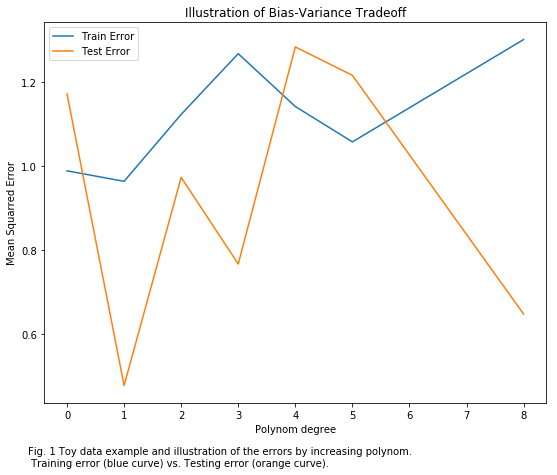

In [8]:
# Let's further analyze the bias variance tradeoff by plotting the train vs test accuracy over model complexity
n = 32
maxdegree = 14 # doing some random shit from 15 onwards
data_split = 0.2 # 20% testing data

bias_test     = np.zeros(maxdegree)
variance_test = np.zeros(maxdegree)
test_error    = np.zeros(maxdegree)

poly_degree = np.zeros(maxdegree)
bias_train     = np.zeros(maxdegree)
variance_train = np.zeros(maxdegree)
train_error    = np.zeros(maxdegree)

for degree in range(maxdegree):
    # set up OLS and fit on training data
    bias_var = lehmannsch_enchantment(function=FrankeFunction, n=n, degree=degree, testing_size=data_split)
    bias_var.Lehmann_OLS_fit(bias_var.X_train, bias_var.y_train, split=True, noise=True)

    # get the design Matrices for test and train data
    testing_designX  = CreateDesignMatrix_X(bias_var.X_test, bias_var.y_test, degree)
    train_designX = bias_var.designMatrix

    # Get Test Error first
    bias_var.Lehmann_Predictions('OLS', testing_designX, split=True)
    test_error[degree] = np.mean( np.mean((bias_var.y_test.ravel() - bias_var.lehmann_prediction)**2, axis=1, keepdims=True) )
    variance_test[degree] = np.mean( np.var(bias_var.lehmann_prediction, axis=1, keepdims=True) )
    bias_test[degree] = np.mean( (bias_var.y_test.ravel() - np.mean(bias_var.lehmann_prediction, axis=1, keepdims=True))**2 )

    # Now let'd get train error
    bias_var.Lehmann_Predictions('OLS', train_designX, split=True)
    train_error[degree] = np.mean( np.mean((bias_var.y_train.ravel() - bias_var.lehmann_prediction)**2, axis=1, keepdims=True) )
    variance_train[degree] = np.mean( np.var(bias_var.lehmann_prediction, axis=1, keepdims=True) )
    bias_train[degree] = np.mean( (bias_var.y_train.ravel() - np.mean(bias_var.lehmann_prediction, axis=1, keepdims=True))**2 )

    poly_degree[degree] = degree

#     print('Polynomial degree:', degree)
#     print('Train Error: {}\nTest  Error: {}'.format(train_error[degree], test_error[degree]))

print(tabulate([ [i,ele, el] for i,ele, el in zip(np.arange(maxdegree), test_error, train_error)], headers=['Degree', 'OLS MSE on Test set', 'OLS MSE on Train set']))

# delete the outliers for a proper plot
test_plot = np.delete(test_error, np.argwhere(test_error > 3))
train_plot =  np.delete(train_error, np.argwhere(test_error > 3))
poly_plot = np.delete(poly_degree, np.argwhere(test_error > 3))

txt = 'Fig. 1 Toy data example and illustration of the errors by increasing polynom. \n Training error (blue curve) vs. Testing error (orange curve).'

fig = plt.figure(figsize=(9,7))
plt.plot(poly_plot, train_plot, label='Train Error')
plt.plot(poly_plot, test_plot, label='Test Error')
plt.ylabel("Mean Squarred Error")
plt.xlabel("Polynom degree")
plt.legend(loc="upper left")
plt.title("Illustration of Bias-Variance Tradeoff")
plt.savefig(plot_dir + '\\bias_variance_tradeoff.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend()
plt.show()

Usually, we should see that the Test Error increases with increeasing Polynomial degree, but since the data is every single time randomly sampled, it is not guaranteed that the expected plot will show up here. However, it should usually look like the plot in Fig. 4 below. <br />


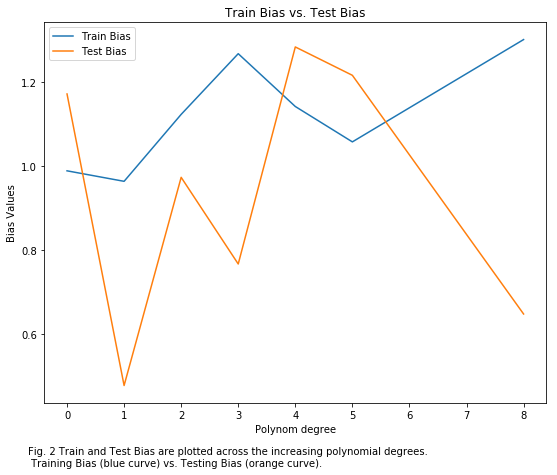

In [9]:
txt = 'Fig. 2 Train and Test Bias are plotted across the increasing polynomial degrees. \n Training Bias (blue curve) vs. Testing Bias (orange curve).'

# delete the outliers for a proper plot
bias_plot = np.delete(bias_test, np.argwhere(test_error > 3))
trainB_plot =  np.delete(bias_train, np.argwhere(test_error > 3))

fig = plt.figure(figsize=(9,7))
plt.plot(poly_plot, trainB_plot, label='Train Bias')
plt.plot(poly_plot, bias_plot, label='Test Bias')
plt.title("Train Bias vs. Test Bias")
plt.ylabel("Bias Values")
plt.xlabel("Polynom degree")
plt.legend()
fig.text(0.1, 0, txt)
plt.savefig(plot_dir + '\\franke_bias.png', transparent=True, bbox_inches='tight')
plt.show()

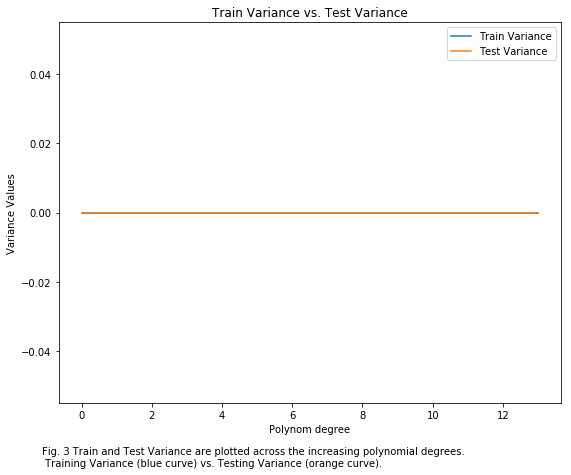

In [72]:
txt = 'Fig. 3 Train and Test Variance are plotted across the increasing polynomial degrees. \n Training Variance (blue curve) vs. Testing Variance (orange curve).'

fig = plt.figure(figsize=(9,7))
plt.plot(poly_degree, variance_train, label='Train Variance')
plt.plot(poly_degree, variance_test, label='Test Variance')
plt.title("Train Variance vs. Test Variance")
plt.ylabel("Variance Values")
plt.xlabel("Polynom degree")
plt.legend()
fig.text(0.1, 0, txt)
plt.savefig(plot_dir + '\\franke_variances.png', transparent=True, bbox_inches='tight')
plt.show()

As you can see in Fig. 1, the gap between Train and Test Error is increasing when the model complexity increases (polynomial degree increases). Having a relatively large polynom for a few data samples brings a jittery regression line, that is intersecting each single datapoint. This is a paradigm for overfitting. Nothing is learned from the given data, since the model is too complex for an easy dataset. [2]<br /> 
Additionally, when looking at the Variance of the model, there is no variance across the entire model to be determined. This means, that we are still on the bias-dominated side or in getting into the transition phase - the sweet spot (see Fig. 4 below). <br />
However, when juggling real data from the world it should look as follows:

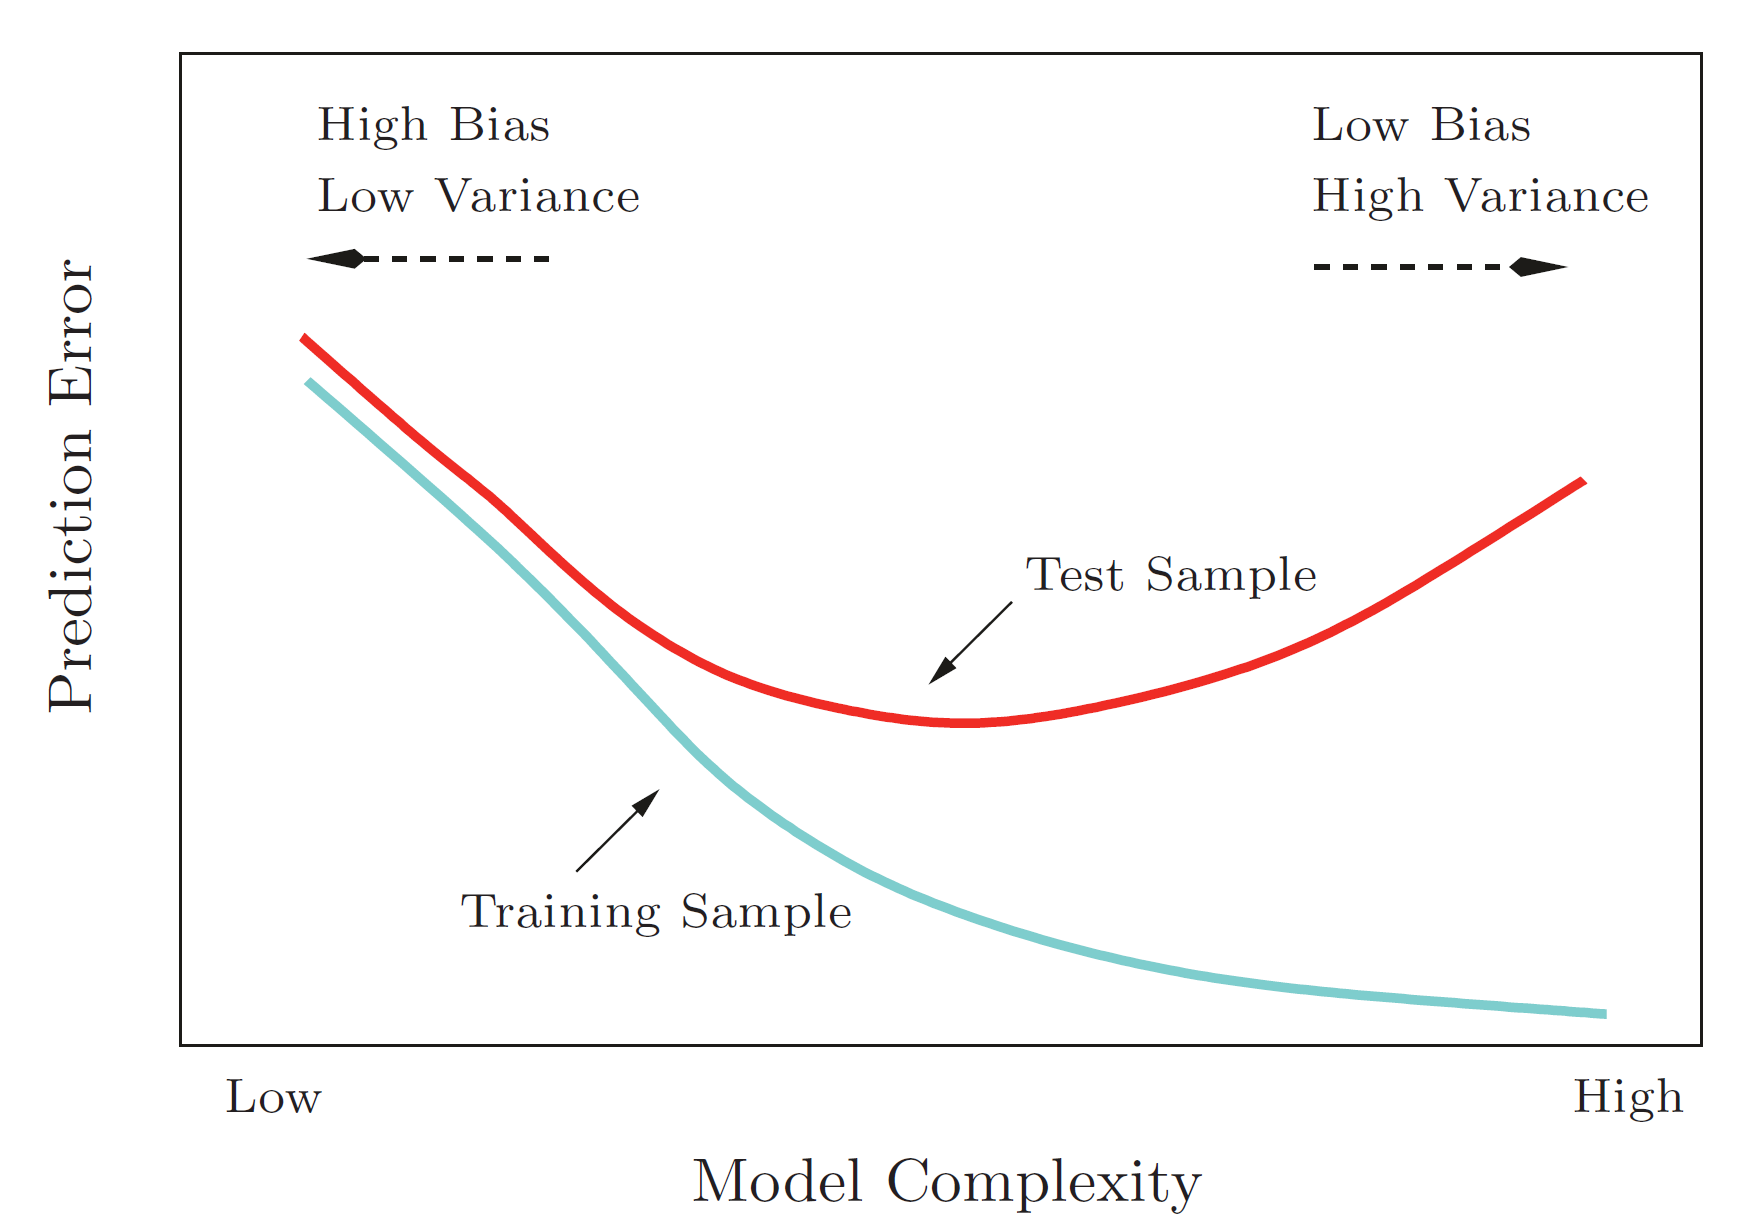

In [27]:
from IPython.display import Image
Image(filename='Test_train_error.PNG')

Fig. 4 Example of a real-world data bias-variance tradeoff and overfitting. Source: Picture taken from [7], Chapter 2, page 38. <br />

Fig. 4 is clearly indicating the bias-variance tradeoff, or often refered to as *overfitting*. <br /> 
When the Errors start to diverge, one should stop the training, since it does not generalize for unseen data then. 
This method is called *Early stopping*. <br />
One should use it, when the error start to drift apart to save valuable time and computing power. <br /> 
If that happens, there are several things you can do: [2] <br />
a.) change the architecture of your current model (different regularization parameters, different amount of hidden layers and/or neurons within a layer, change the algorithm, instead of Random Forests try to use Neural Nets and vice versa, ...) <br /> 
b.) add more (training) data. The more data, the better the model can learn from it. 



### Ridge and Lasso Regression and the effect of lambda

Ridge and Lasso regression both utilize a regularization parameter $\lambda$ (see equations (9) and (13) in the introduction part). Now, we want to compare the different regression methods with respect to the parameter $\lambda$ along with the polynomial degree (= model complexity) as we know it from the previous plot on the MSE and $R^2$ Score. <br /> 
Note, I implemented only Ridge regression myself, Lasso is taken from the beautiful SKLearn library.

C:\Users\Lenny\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


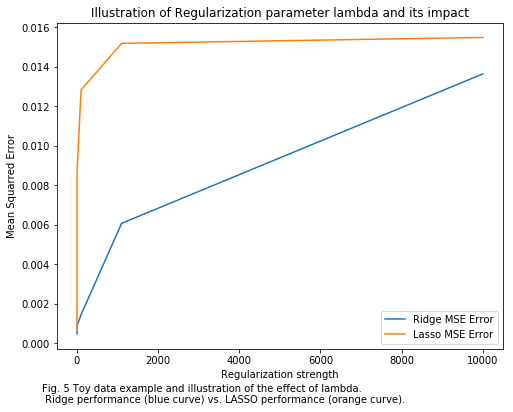

In [10]:
n_data_points = 100
polynom_degree = 5 # let's focus only on the fifth order polynomial degree
testing_size = 0.2
splitting = True
noise = False # want to add noise to our fits?
lambda_to_test = [0.0001, 0.1, 100, 1100, 10000]

# store the errors to plot them later on
r2  = np.zeros(len(lambda_to_test))
mse = np.zeros(len(lambda_to_test))
r2_lasso  = np.zeros(len(lambda_to_test))
mse_lasso = np.zeros(len(lambda_to_test))

variance_test = np.zeros(len(lambda_to_test))
bias_test     = np.zeros(len(lambda_to_test))

for i,lamda in enumerate(lambda_to_test):
    # Initialize the RegressionMethods class with the Ridge and Lasso Regression included
    scrutinizing_lamda = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, lamda=lamda, degree=polynom_degree, testing_size=testing_size)

    # fit the model, create the design Matrix for Evaluation and evaluate
    scrutinizing_lamda.Lehmann_Ridge_fit(scrutinizing_lamda.lamda, scrutinizing_lamda.X_train, scrutinizing_lamda.y_train, splitting, noise)
    testing_X  = CreateDesignMatrix_X(scrutinizing_lamda.X_test, scrutinizing_lamda.y_test, scrutinizing_lamda.degree)
    scrutinizing_lamda.Lehmann_Predictions('RIDGE', testing_X, split=splitting)
    
    # same shit for LASSO, but this predicts straight away and has the predictions in member variable stored
    scrutinizing_lamda.Sklearn_Lasso(scrutinizing_lamda.lamda, scrutinizing_lamda.X_train, scrutinizing_lamda.y_train, noise=noise)
    
    # Initialize the Score Class for RIDGE for the R2 and MSE error
    scoring = lehmann_approved(scrutinizing_lamda.test_targets, scrutinizing_lamda.lehmann_ridge_pred)
    mse[i] = scoring.MeanSquaredError()
    r2[i]  = scoring.R2_Score()
    
    # LASSO Scores
    sk_lasso = lehmann_approved(scrutinizing_lamda.test_targets, scrutinizing_lamda.sklearn_lasso)
    mse_lasso[i] = sk_lasso.MeanSquaredError()
    r2_lasso[i]  = sk_lasso.R2_Score()
    
    # get bias and variance
    variance_test[i] = np.var(scrutinizing_lamda.lehmann_ridge_pred)
    bias_test[i] = np.mean( (scrutinizing_lamda.y_test.ravel() - np.mean(scrutinizing_lamda.lehmann_ridge_pred, axis=1, keepdims=True))**2 )
    
#     print("\nSKLearn LASSO, split: True, noise: {},  MSE: {}".format(noise, sk_lasso.MeanSquaredError()))
#     print("SKLearn LASSO, split: True, noise: {},  R2: {}".format(noise, sk_lasso.R2_Score()))
#     print("\nMy Ridge, split: {}, noise: {},  MSE: {}".format(splitting, noise, scoring.MeanSquaredError()))
#     print("My Ridge, split: {}, noise: {},  R2 : {}".format(splitting, noise, scoring.R2_Score()))

# A plot is saying more than 1000 words could describe it - so let's describe what we see then: 
txt = 'Fig. 5 Toy data example and illustration of the effect of lambda. \n Ridge performance (blue curve) vs. LASSO performance (orange curve).'
fig = plt.figure(figsize=(8,6))
plt.plot(lambda_to_test, mse, label='Ridge MSE Error')
plt.plot(lambda_to_test, mse_lasso, label='Lasso MSE Error')
plt.ylabel("Mean Squarred Error")
plt.xlabel("Regularization strength")
plt.legend(loc="upper left")
plt.title("Illustration of Regularization parameter lambda and its impact")
plt.savefig(plot_dir + '\\lambda_effects_mse.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend()
plt.show()

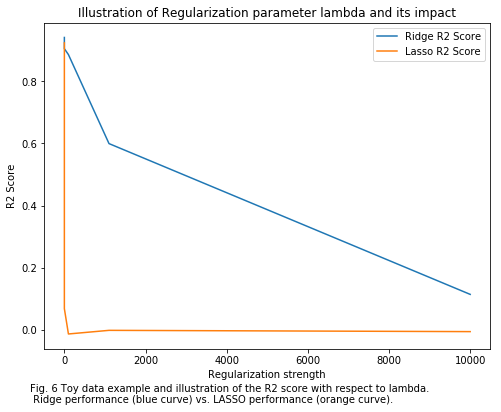

In [11]:
# A plot is saying more than 1000 words could describe it - so let's describe it then: 
txt = 'Fig. 6 Toy data example and illustration of the R2 score with respect to lambda. \n Ridge performance (blue curve) vs. LASSO performance (orange curve).'
fig = plt.figure(figsize=(8,6))
plt.plot(lambda_to_test, r2, label='Ridge R2 Score')
plt.plot(lambda_to_test, r2_lasso, label='Lasso R2 Score')
plt.ylabel("R2 Score")
plt.xlabel("Regularization strength")
plt.legend(loc="upper left")
plt.title("Illustration of Regularization parameter lambda and its impact")
plt.savefig(plot_dir + '\\lambda_effects_r2.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend()
plt.show()

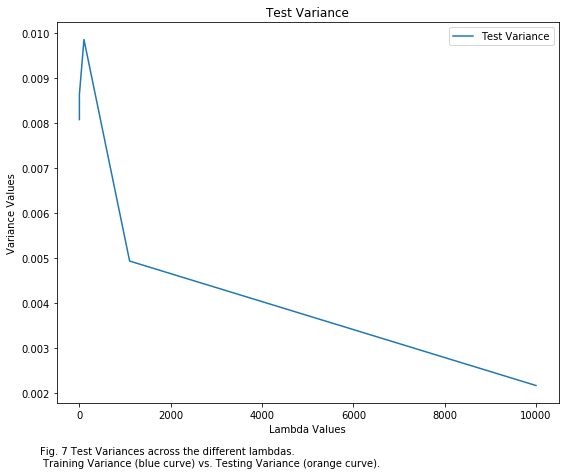

In [12]:
txt = 'Fig. 7 Test Variances across the different lambdas. \n Training Variance (blue curve) vs. Testing Variance (orange curve).'
fig = plt.figure(figsize=(9,7))
plt.plot(lambda_to_test, variance_test, label='Test Variance')
#plt.plot(poly_degree, variance_test, label='Test Variance')
plt.title("Test Variance")
plt.ylabel("Variance Values")
plt.xlabel("Lambda Values")
plt.legend()
fig.text(0.1, 0, txt)
plt.savefig(plot_dir + '\\franke_variances_ridge.png', transparent=True, bbox_inches='tight')
plt.show()

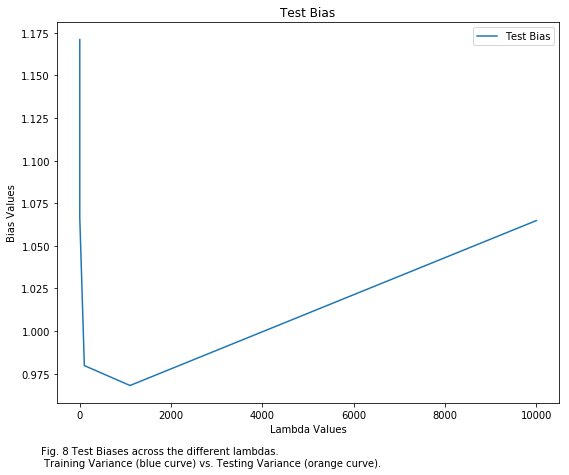

In [13]:
txt = 'Fig. 8 Test Biases across the different lambdas. \n Training Variance (blue curve) vs. Testing Variance (orange curve).'
fig = plt.figure(figsize=(9,7))
plt.plot(lambda_to_test, bias_test, label='Test Bias')
#plt.plot(poly_degree, variance_test, label='Test Variance')
plt.title("Test Bias")
plt.ylabel("Bias Values")
plt.xlabel("Lambda Values")
plt.legend()
fig.text(0.1, 0, txt)
plt.savefig(plot_dir + '\\franke_bias_ridge.png', transparent=True, bbox_inches='tight')
plt.show()

Looking at Fig. 5 and Fig. 6, the higher the regularization parameter $\lambda$, the worse the Error measure gets. <br /> 
Since only testing to higher values of $\lambda$ (100, 1100 and 10000), the plot appears linear but only due to missing values in between, one can assume some jitter there, but the trend of this curve will basically be following this linear line from 100 to 10000. <br />
Furthermore, both scores clearly show that Ridge Regression is far superior to Lasso Regression. <br /> 

The plots of bias and variance (Fig. 7 and Fig. 8) with respect to different parametrization of $\lambda$ reveals that small $\lambda$-values allow the model to fit on each individual data point, leading to large variance. [2]<br />
A large $\lambda$ pulls the parameters toward zero resulting in a large bias. [2] <br />

In [14]:
n_data_points = 80
testing_size = 0.2
splitting = True
noise = False # want to add noise to our fits?
lambda_to_test = [0.00001, 0.03, 128, 1000]
maxdegree = 10 # doing some random shit from 15 onwards

plot_train_test_tables = False # plots the Train and Test Errors for Lasso and Ridge

# store the errors to plot them later on
ols_mse_test = np.zeros((maxdegree,)) # since no dependence on lambda we only need a 1D vector
ols_r2_test  = np.zeros((maxdegree,))

r2_ridge_train  = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
r2_ridge_test   = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
mse_ridge_train = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
mse_ridge_test  = np.zeros((maxdegree, len(lambda_to_test) + 1 ))

r2_lasso_train  = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
r2_lasso_test   = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
mse_lasso_train = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
mse_lasso_test  = np.zeros((maxdegree, len(lambda_to_test) + 1 ))

for degree in range(maxdegree):
    # let's also evaluate our OLS model to benchmark each of the 3 regression algorithms
    benching_ols = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, degree=degree, testing_size=testing_size)
    benching_ols.Lehmann_OLS_fit(benching_ols.X_train, benching_ols.y_train)
    testing_X  = CreateDesignMatrix_X(benching_ols.X_test, benching_ols.y_test, degree)
    
    benching_ols.Lehmann_Predictions('OLS', testing_X, split=splitting)
    
    # score MSE and R2 on Test dataset
    ols_scoring = lehmann_approved(benching_ols.test_targets, benching_ols.lehmann_prediction)
    ols_mse_test[degree] = ols_scoring.MeanSquaredError()
    ols_r2_test[degree]  = ols_scoring.R2_Score()
    
    # ATTENTION Take same dataset for the regression method -> Lasso and Ridge get benching_ols.X_train and .y_train
    for i,lamda in enumerate(lambda_to_test, 1):
        # Initialize the RegressionMethods class with the Ridge and Lasso Regression included
        scrutinizing_lamda = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, lamda=lamda, degree=degree, testing_size=testing_size)

        # fit the model, create the design Matrix for Evaluation and evaluate
        scrutinizing_lamda.Lehmann_Ridge_fit(scrutinizing_lamda.lamda, benching_ols.X_train, benching_ols.y_train, splitting, noise)
        scrutinizing_lamda.Lehmann_Predictions('RIDGE', testing_X, split=splitting)
        
        # since train and test share the same member variable for prediction we first have to evaluate the test error
        # Initialize the Score Class for RIDGE for the R2 and MSE error
        scoring = lehmann_approved(benching_ols.test_targets, scrutinizing_lamda.lehmann_ridge_pred)
        mse_ridge_test[degree, 0] = degree
        mse_ridge_test[degree, i] = scoring.MeanSquaredError()
        r2_ridge_test[degree, 0] = degree
        r2_ridge_test[degree, i] = scoring.R2_Score()
        
        # Now again do the same for Train data to get this Accuracy
        scrutinizing_lamda.Lehmann_Predictions('RIDGE', benching_ols.designMatrix, split=splitting)
        scoring_train = lehmann_approved(benching_ols.train_targets, scrutinizing_lamda.lehmann_ridge_pred)
        mse_ridge_train[degree, 0] = degree
        mse_ridge_train[degree, i] = scoring_train.MeanSquaredError()
        r2_ridge_train[degree, 0] = degree
        r2_ridge_train[degree, i] = scoring_train.R2_Score()
    
        # same shit for LASSO, but this predicts straight away and has the predictions in member variable stored
        scrutinizing_lamda.Sklearn_Lasso(scrutinizing_lamda.lamda, benching_ols.X_train, benching_ols.y_train, evaluate_train_error=False, noise=noise)

        # LASSO Scores
        sk_lasso = lehmann_approved(benching_ols.test_targets, scrutinizing_lamda.sklearn_lasso)
        mse_lasso_test[degree, 0] = degree
        mse_lasso_test[degree, i] = sk_lasso.MeanSquaredError()
        r2_lasso_test[degree, 0] = degree
        r2_lasso_test[degree, i] = sk_lasso.R2_Score()
        
        # Again Evaluating the Train Error now
        scrutinizing_lamda.Sklearn_Lasso(scrutinizing_lamda.lamda, benching_ols.X_train, benching_ols.y_train, evaluate_train_error=True, noise=noise)
        sk_lasso = lehmann_approved(benching_ols.train_targets, scrutinizing_lamda.sklearn_lasso)
        mse_lasso_train[degree, 0] = degree
        mse_lasso_train[degree, i] = sk_lasso.MeanSquaredError()
        r2_lasso_train[degree, 0] = degree
        r2_lasso_train[degree, i] = sk_lasso.R2_Score()

if plot_train_test_tables:
    # print the results in an attractive table
    print("RIDGE")
    r2_ridge_test2 = r2_ridge_test # copy one for deleting the first column of the arrays
    if r2_ridge_test2.shape[1] >= len(lambda_to_test): # not deleting more than the degree column
        r2_ridge_test2 = np.delete(r2_ridge_test, 0, 1)  # delete degree entry from array
        mse_ridge_test2 = np.delete(mse_ridge_test, 0, 1)  # delete degree entry from array
    print(tabulate([ [n,*i] for n,i in zip(np.arange(maxdegree), mse_ridge_test2)], headers=['Degree', *["MSE λ: " + str(l) for l in lambda_to_test]]))
    print(tabulate([ [n,*i] for n,i in zip(np.arange(maxdegree), r2_ridge_test2)],  headers=['Degree', *["R2 λ: " + str(l) for l in lambda_to_test]]))

    print("\nLASSO")
    if r2_ridge_test2.shape[1] >= len(lambda_to_test): # not deleting more than the degree column
        r2_lasso_test_no_degree = np.delete(r2_lasso_test, 0, 1)  # delete degree entry from array
        mse_lasso_test_no_degree = np.delete(mse_lasso_test, 0, 1)  # delete degree entry from array
    print(tabulate([ [n,*i] for n,i in zip(np.arange(maxdegree), mse_lasso_test_no_degree)], headers=['Degree', *["MSE λ: " + str(l) for l in lambda_to_test]]))
    print(tabulate([ [n,*i] for n,i in zip(np.arange(maxdegree), r2_lasso_test_no_degree)],  headers=['Degree', *["R2 λ: " + str(l) for l in lambda_to_test]]))

In [15]:
# Tabulate the MSE Error on Test only Across Lasso, Ridge, OLS
# extract the best lambda column with the best test mse scores
ridge_row, ridge_col = np.where(mse_ridge_test[:, 1:] == np.amin(mse_ridge_test[:, 1:]))
lasso_row, lasso_col = np.where(mse_lasso_test[:, 1:] == np.amin(mse_lasso_test[:, 1:]))

# create the table on MSE
total_mse = np.hstack((np.arange(maxdegree).reshape(-1, 1),ols_mse_test.reshape(-1, 1), mse_ridge_test[:, ridge_col], mse_lasso_test[:, lasso_col]))
print(tabulate(total_mse, headers=['Degree', 'MSE on Test set, OLS', 'MSE on Test set, Ridge', 'MSE on Test set, Lasso']))

# same for R2
print('\n')
total_r2 = np.hstack((np.arange(maxdegree).reshape(-1, 1),ols_r2_test.reshape(-1, 1), r2_ridge_test[:, ridge_col], r2_lasso_test[:, lasso_col]))
print(tabulate(total_r2, headers=['Degree', 'R2 on Test set, OLS', 'R2 on Test set, Ridge', 'R2 on Test set, Lasso']))

  Degree    MSE on Test set, OLS    MSE on Test set, Ridge    MSE on Test set, Lasso
--------  ----------------------  ------------------------  ------------------------
       0              0.0096079                 0.00974548                0.00984238
       1              0.00896104                0.011714                  0.0119997
       2              0.0156953                 0.0153321                 0.0163041
       3              0.0259871                 0.0183129                 0.0151459
       4              0.00951153                0.00875117                0.0140598
       5              0.0411188                 0.0260544                 0.0243551
       6              0.0376801                 0.0266341                 0.0153418
       7              0.024785                  0.0132449                 0.0143428
       8              0.0509821                 0.0158613                 0.0117052
       9              0.0226737                 0.0132055                

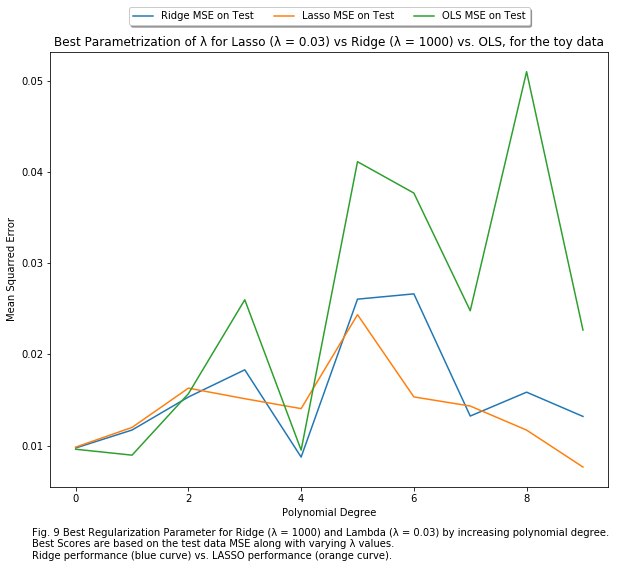

In [16]:
# ONLY PLOT THE BEST SCORES OF THE MODEL AND COMPARE LASSO vs. RIDGE
# A plot is saying more than 1000 words could describe it - so let's describe what we see then: 
txt = 'Fig. 9 Best Regularization Parameter for Ridge (λ = ' + str(lambda_to_test[int(ridge_col)]) + ') and Lambda (λ = ' + str(lambda_to_test[int(lasso_col)]) + ') by increasing polynomial degree. \nBest Scores are based on the test data MSE along with varying λ values.  \nRidge performance (blue curve) vs. LASSO performance (orange curve).'
fig = plt.figure(figsize=(10, 8))

plt.plot(mse_lasso_test[:, 0], mse_ridge_test[:, ridge_col], label="Ridge MSE on Test")
plt.plot(mse_lasso_test[:, 0], mse_lasso_test[:, lasso_col], label="Lasso MSE on Test")
plt.plot(mse_lasso_test[:, 0], ols_mse_test, label="OLS MSE on Test")

# for i, lamda in enumerate(lambda_to_test, 1):
#     plt.plot(mse_lasso_test[:, 0], mse_lasso_test[:, i], label= 'Test Regularization: ' + str(lamda))
    #plt.plot(mse_lasso_train[:, 0], mse_lasso_train[:, i], label= 'Train Regularization: ' + str(lamda))
    
plt.ylabel("Mean Squarred Error")
plt.xlabel("Polynomial Degree")
plt.legend(loc="upper left")
plt.title('Best Parametrization of λ for Lasso (λ = ' + str(lambda_to_test[int(lasso_col)]) + ') vs Ridge (λ = ' + str(lambda_to_test[int(ridge_col)]) + ') vs. OLS, for the toy data')
plt.savefig(plot_dir + '\\franke_models.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.show()

### Takeaway for Franke Function data

Looking at the results above (Fig. 9), you can see that all algorithms share a performance for the randomly generated data. <br /> 
By doing grid search over $\lambda$, it is possible to find the best regularization parameter for the given data for Ridge and Lasso, respectively. <br /> 
Note, the best $\lambda$ for Ridge is not necessarily the best $\lambda$ for Lasso and vice versa. <br /> 
Having more processing power at hand, evaluating over a random set of $\lambda$ would even yield better results, since in the work above, there have only been some few $\lambda$ parameters assessed. <br /> 
However, to sum up the work for the Franke function, one can say that the OLS method is superior with respect to the error measurements (R2 and MSE), than its regularized derivations, Ridge and Lasso regression. <br /> 
Applying these algorithms to different datasets does not mean that OLS will also outperform Ridge and Lasso, since the choice of the algorihtm is very application and thus data sepcific.

One thing to highlight at this point: In my opinion it does not make any sense of benchmarking the time for fitting or for fitting and predicting across the different algorithms for several reasons.
Since, I implemented the OLS and Ridge Regression myself there is no code runtime optimization being done and thus would be unfair to test it against the SKLearn library (Lasso implementation), where some Cracks of that library love dealing with bits and bytes to squeeze that extra nanosecond out of this function. <br /> 
Additionally, due to the choice of Python as programming language, I anyway stated with that, that time performance bothers me as much as the decisions from a council in Zimbabwe - absolutely not. <br /> 
Usually C++ would be a great choice for performance testing for these algorihtms. <br /> 
However, since I am only interested in the error measurements of the regression methods, Python is a beautiful language to code it up and compare the results of them (since they would not change in C++ and Python).

## Terrain Data

After introducing and explaining the three regression techniques with "artificial data" (generated data), now comes the time to leverage the real data from two scenes in Norway. First of all, you can see the topography of these regions in the figures below (Fig. 10 and Fig. 11). <br /> 
This part focuses on the parametrization of the terrain data with respect to Fig. 11. If you want to change the scenerey, you can do so, but then the text might not be the same, since the data changed. <br /> 
Comparing the regression methods we discussed earlier with each other will result in the best regression method for the Møsvatn Austfjell area topology data in Norway.

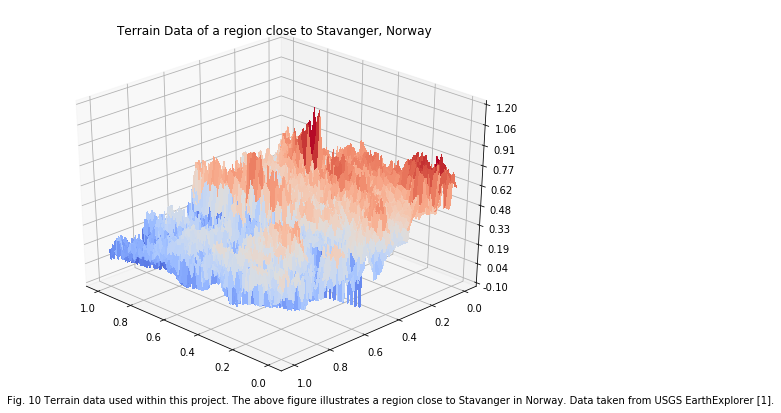

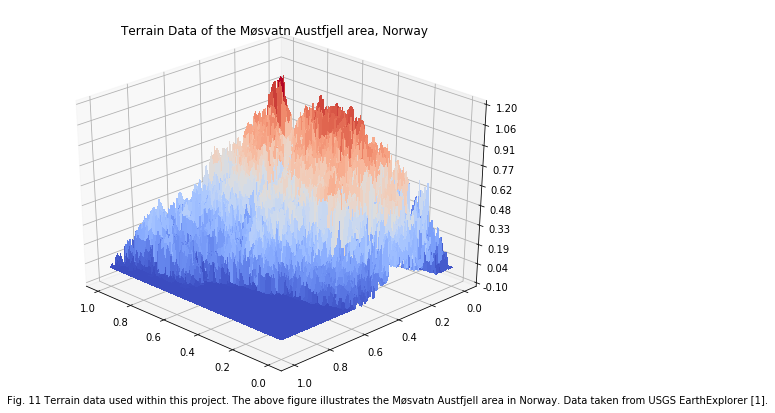

In [17]:
# import the image libraries we need
from PIL import Image
from imageio import imread
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_terrain(file_number=1):
    # caption the plot
    if file_number == 2:
        area_name = 'the Møsvatn Austfjell area'
        plot_number = 11
    else:
        area_name = 'a region close to Stavanger'
        plot_number = 10
    txt = 'Fig. ' + str(plot_number) + ' Terrain data used within this project. The above figure illustrates ' + area_name + ' in Norway. Data taken from USGS EarthExplorer [1].'
    # read the file and generate the data
    fileName = os.path.join(os.getcwd(), 'SRTM_data_Norway_' + str(file_number) + '.tif')
    image = Image.open(fileName, mode='r')
    image.mode = 'I'
    #print(image.size) # width, height
    x = np.linspace(0, 1, image.size[0])
    y = np.linspace(0, 1, image.size[1])
    X,Y = np.meshgrid(x,y)
    Z = np.array(image)
    Z = Z - np.min(Z)
    Z = Z / np.max(Z)
    
    # plot the figure
    fig = plt.figure(figsize=(9,7))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.set_zlim(-0.10, 1.20)
    ax.set_title("Terrain Data of " + area_name + ", Norway")
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(30, 45+90)
    fig.text(.1,.1,txt)
    #plt.savefig(plot_dir + '\\terrain_' + area_name + '.png', transparent=True, bbox_inches='tight')
    plt.show()
plot_terrain()
plot_terrain(2)

In the figures above we can see the 3D plot of our areas in Norway. 
Since we want to perform some Regression algorithms on it we need to read the data accordingly in $x, y, z$.

In [18]:
def terrain_to_x_y_z(self, filenumber=1):
    #setting up data points for real data
    z = imread('SRTM_data_Norway_' + str(filenumber) + '.tif')
    x = np.linspace(0, 1, len(z[1])).reshape(len(z[1]),1)
    y = np.linspace(0, 1, len(z)).reshape(len(z),1) # normalized data from 0 to 1
    terrain_x, terrain_y = np.meshgrid(x,y)
    terrain_z = z/np.max(z) # normalize
    return terrain_x, terrain_y, terrain_z

In [19]:
mosvatn_x, mosvatn_y, mosvatn_z = terrain_to_x_y_z(2)
print(mosvatn_x.shape, mosvatn_y.shape, mosvatn_z.shape)
# that will be the shape of our matrix and is the image size (height, width)

(3601, 1801) (3601, 1801) (3601, 1801)


It counts to predict the height, which serves as the target for the regression problem at hand. <br />
Thus having two predictor variables (*x, y*) and the target output *z*.

Here it is important to mention that we need to shuffle the data within our dataset, otherwise a worse score will be predicted as shown in the upcoming following tables. <br />
Randomly shuffling the data mixes up the higher elevated points, which are more present in the far back of the terrain (see Fig. 10 and 11), to have both, high and low elevated points within our data for training and testing. <br />


In [20]:
print(mosvatn_z[:4, :]) # first 4 height 'rows' and entire width

[[0.6225 0.6247 0.6268 ... 0.4992 0.4944 0.4944]
 [0.6263 0.6279 0.6295 ... 0.5046 0.4976 0.4944]
 [0.6284 0.629  0.6306 ... 0.5067 0.5008 0.4954]
 [0.6306 0.6306 0.6311 ... 0.5067 0.5019 0.4971]]


In [21]:
## putting the data into the right shape
X = np.vstack([mosvatn_x.ravel(), mosvatn_y.ravel()]).T
y = np.reshape(mosvatn_z, X.shape[0])

## for our split we will have to enable the shuffling, since it could just learn the position by time.
## to get random samples from the entire space and not spatial correlated once we just enable the shuffling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# bring both training data to same shape 
y_train = np.vstack([y_train, y_train]).T

y_test =  np.vstack([y_test, y_test]).T
print(X_train.shape, y_train.shape)

(5188320, 2) (5188320, 2)


Since we exploited the classes and the methods from the included Python file, I decided to just code the OLS and Ridge Regression down below for the real data, since it only takes a few lines of code. 

In [22]:
# GENERATE TARGETS AND NOISY TARGETS TO GET THE BETA VALUES
## create noisy targets for our beta values
noisy_2D  = np.vstack([np.random.normal(0, 0.4, X_train.shape[0]).ravel(), np.random.normal(0, 0.4, X_train.shape[0]).ravel()]).T 
z_noisy = FrankeFunction(X_train, y_train) + (5 * noisy_2D)

## also generate the proper targets
train_target =  FrankeFunction(X_train, y_train)
test_target  = FrankeFunction(X_test, y_test)

## Set up the degrees and regularizations we want to test along with the scores
max_poly_degree = 6
lambda_set = [0.0000001, 0.00000008, 0.005]

# OLS train and test scores
mse_OLS_train = np.zeros(max_poly_degree)
mse_OLS_test  = np.zeros(max_poly_degree)
r2_OLS_train  = np.zeros(max_poly_degree)
r2_OLS_test   = np.zeros(max_poly_degree)

OLS_var   = np.zeros(max_poly_degree)
ridge_var = np.zeros((max_poly_degree, len(lambda_set)))
lasso_var = np.zeros((max_poly_degree, len(lambda_set)))

# Ridge train and test scores
mse_ridge_train = np.zeros((max_poly_degree, len(lambda_set) + 1 ))
mse_ridge_test  = np.zeros((max_poly_degree, len(lambda_set) + 1 ))
r2_ridge_train  = np.zeros((max_poly_degree, len(lambda_set) + 1 ))
r2_ridge_test   = np.zeros((max_poly_degree, len(lambda_set) + 1 ))

# Lasso train and test scores
mse_lasso_train = np.zeros((max_poly_degree, len(lambda_set) + 1 ))
mse_lasso_test  = np.zeros((max_poly_degree, len(lambda_set) + 1 ))
r2_lasso_train  = np.zeros((max_poly_degree, len(lambda_set) + 1 ))
r2_lasso_test   = np.zeros((max_poly_degree, len(lambda_set) + 1 ))

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, metrics

# now check the proper parametrization and benchmark the algorithms against each other
for degree in range(max_poly_degree):
    # put everything that DOES NOT depend on lamda in this loop --> entire OLS & design Matrices
    print("Evaluate next degree, now at: " + str(degree) + ' out of: ' + str(max_poly_degree-1))
    # Train design Matrix to fit our regression model
    X = CreateDesignMatrix_X(X_train.ravel(), y_train.ravel(), degree)
    # Test design Matrix to evaluate the Test Set
    dX_test = CreateDesignMatrix_X(X_test.ravel(), y_test.ravel(), degree)
    
    try:   # normal OLS beta calculation via matrix inversion
        beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(z_noisy.reshape(-1,1))
    except:
        # SVD way of beta
        U, s, VT = np.linalg.svd(X)
        D = np.zeros((len(U),len(VT)))
        for i in range(0,len(VT)):
            D[i,i]=s[i]
        UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
        beta = np.matmul(V,np.matmul(invD,UT))
    
    # OLS prediction
    train_pred_OLS = X.dot(beta)
    test_pred_OLS  = dX_test.dot(beta)
    
    mse_OLS_train[degree] = metrics.mean_squared_error(train_target.ravel(), train_pred_OLS)
    # OLS is doing this one:  np.mean( np.mean( (train_target.ravel() - train_pred_OLS)**2, axis=1, keepdims=True) )
    mse_OLS_test[degree]  = metrics.mean_squared_error(test_target.ravel(), test_pred_OLS)
    
    r2_OLS_train[degree]  = metrics.r2_score(train_target.ravel(), train_pred_OLS)
    r2_OLS_test[degree]   = metrics.r2_score(test_target.ravel(), test_pred_OLS)
    
    OLS_var[degree] = np.var(test_pred_OLS)
    
    # Now moving on to Ridge and Lasso Regression since they have a dependence on lambda
    for i,lamda in enumerate(lambda_set, 1):
        # for Ridge
        beta_ridge = np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + lamda * np.eye(X.shape[1])), np.dot(np.transpose(X),z_noisy.reshape(-1, 1)))

        # SKLearn Lasso stuff
        polynom    = PolynomialFeatures(degree=degree)
        XY         = polynom.fit_transform(np.array([X_train.ravel(), y_train.ravel()]).T)
        lasso      = linear_model.Lasso(fit_intercept=True, alpha=lamda)
        lasso.fit(XY, z_noisy.reshape(-1, 1))
        test_feed  = polynom.fit_transform(np.array([X_test.ravel(), y_test.ravel()]).T)
        train_feed = polynom.fit_transform(np.array([X_train.ravel(), y_train.ravel()]).T)
        
        # Ridge Prediction
        train_pred_ridge = X.dot(beta_ridge)
        test_pred_ridge = dX_test.dot(beta_ridge)

        # Lasso Prediction
        train_pred_lasso = lasso.predict(train_feed)
        test_pred_lasso  = lasso.predict(test_feed)
        
        ridge_var[degree, i-1] = np.var(test_pred_ridge)
        lasso_var[degree, i-1] = np.var(test_pred_lasso)
    
        # Evaluate the MSE and R2 Score for lasso ...
        mse_lasso_train[degree, 0] = degree
        mse_lasso_train[degree, i] = metrics.mean_squared_error(train_target.ravel(), train_pred_lasso)
        r2_lasso_train[degree, 0]  = degree
        r2_lasso_train[degree, i]  = metrics.r2_score(train_target.ravel(), train_pred_lasso)
        mse_lasso_test[degree, 0]  = degree
        mse_lasso_test[degree, i]  = metrics.mean_squared_error(test_target.ravel(), test_pred_lasso)
        r2_lasso_test[degree, 0]   = degree
        r2_lasso_test[degree, i]   = metrics.r2_score(test_target.ravel(), test_pred_lasso)
        
        # ... and now Ridge
        mse_ridge_train[degree, 0] = degree
        mse_ridge_train[degree, i] = metrics.mean_squared_error(train_target.ravel(), train_pred_ridge)
        r2_ridge_train[degree, 0]  = degree
        r2_ridge_train[degree, i]  = metrics.r2_score(train_target.ravel(), train_pred_ridge)
        mse_ridge_test[degree, 0]  = degree
        mse_ridge_test[degree, i]  = metrics.mean_squared_error(test_target.ravel(), test_pred_ridge)
        r2_ridge_test[degree, 0]   = degree
        r2_ridge_test[degree, i]   = metrics.r2_score(test_target.ravel(), test_pred_ridge)

Evaluate next degree, now at: 0 out of: 5
Evaluate next degree, now at: 1 out of: 5
Evaluate next degree, now at: 2 out of: 5
Evaluate next degree, now at: 3 out of: 5


C:\Users\Lenny\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Evaluate next degree, now at: 4 out of: 5
Evaluate next degree, now at: 5 out of: 5


In [24]:
print("OLS - does not depend on λ WITH SHUFFLING")
print(tabulate([ [i,ele, el] for i,ele, el in zip(np.arange(max_poly_degree), mse_OLS_test, mse_OLS_train)], headers=['Degree', 'OLS MSE on Test set', 'OLS MSE on Train set']))

OLS - does not depend on λ WITH SHUFFLING
  Degree    OLS MSE on Test set    OLS MSE on Train set
--------  ---------------------  ----------------------
       0             0.038784                0.0388007
       1             0.0209869               0.0209711
       2             0.0100777               0.0100612
       3             0.00722453              0.00721546
       4             0.00215065              0.0021505
       5             0.00145079              0.00144743


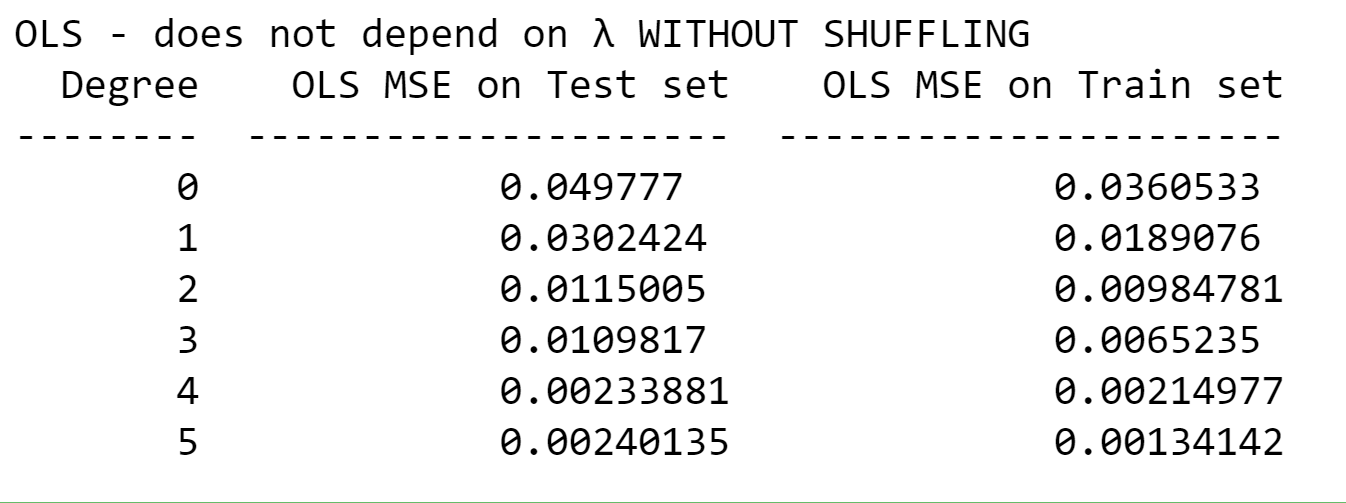

In [28]:
Image(filename='plots/no_shuffle_terrain_OLS.PNG')

In [29]:
# get the best lambda values for ridge and lasso
ridge_row, ridge_col = np.where(mse_ridge_test[:, 1:] == np.amin(mse_ridge_test[:, 1:])) # get rid of the degree column
lasso_row, lasso_col = np.where(mse_lasso_test[:, 1:] == np.amin(mse_lasso_test[:, 1:]))
ridge_col += 1 # add the degree again
lasso_col += 1

# create the table on MSE
total_mse = np.hstack((np.arange(max_poly_degree).reshape(-1,1), mse_OLS_test.reshape(-1,1), mse_ridge_test[:, ridge_col].reshape(-1,1), mse_lasso_test[:, lasso_col].reshape(-1,1)))
print(tabulate(total_mse, headers=['Degree', 'MSE OLS', 'MSE Ridge (λ = ' + str(lambda_set[int(ridge_col)-1]) + ')', 'MSE Lasso (λ = ' + str(lambda_set[int(lasso_col)-1]) + ')']))

# same for R2
print('\n')
total_r2 = np.hstack((np.arange(max_poly_degree).reshape(-1,1), r2_OLS_test.reshape(-1, 1), r2_ridge_test[:, ridge_col].reshape(-1,1), r2_lasso_test[:, lasso_col].reshape(-1,1)))
print(tabulate(total_r2, headers=['Degree', 'R2 OLS', 'R2 Ridge (λ = ' + str(lambda_set[int(ridge_col)-1]) + ')', 'R2 Lasso (λ = ' + str(lambda_set[int(lasso_col)-1]) + ')']))

  Degree     MSE OLS    MSE Ridge (λ = 0.005)    MSE Lasso (λ = 1e-07)
--------  ----------  -----------------------  -----------------------
       0  0.038784                 0.038784                 0.038784
       1  0.0209869                0.0209869                0.0209869
       2  0.0100777                0.0100777                0.0100777
       3  0.00722453               0.00722453               0.00730782
       4  0.00215065               0.00215061               0.00668069
       5  0.00145079               0.0014504                0.00588132


  Degree        R2 OLS    R2 Ridge (λ = 0.005)    R2 Lasso (λ = 1e-07)
--------  ------------  ----------------------  ----------------------
       0  -1.77043e-07            -1.77044e-07            -1.77043e-07
       1   0.458876                0.458876                0.458876
       2   0.740159                0.740159                0.740159
       3   0.813724                0.813724                0.811576
       4   0.9445

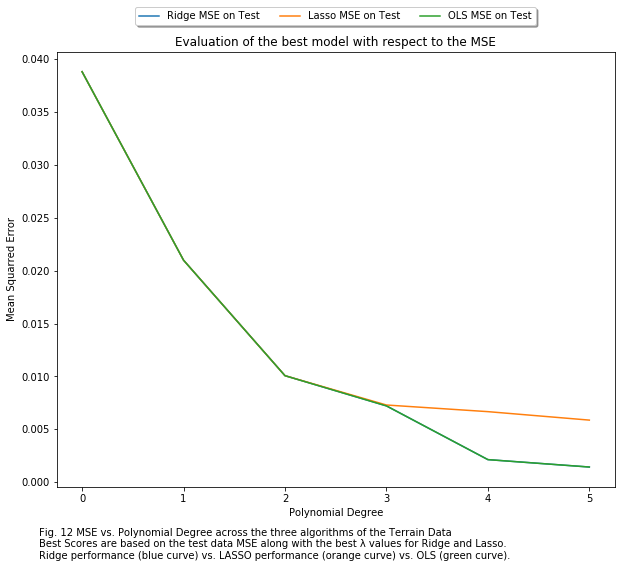

In [30]:
# ONLY PLOT THE BEST SCORES
# A plot is saying more than 1000 words could describe it - so let's describe what we see then: 
txt = 'Fig. 12 MSE vs. Polynomial Degree across the three algorithms of the Terrain Data \nBest Scores are based on the test data MSE along with the best λ values for Ridge and Lasso.  \nRidge performance (blue curve) vs. LASSO performance (orange curve) vs. OLS (green curve).'
fig = plt.figure(figsize=(10, 8))

plt.plot(mse_lasso_test[:, 0], mse_ridge_test[:, ridge_col], label="Ridge MSE on Test")
plt.plot(mse_lasso_test[:, 0], mse_lasso_test[:, lasso_col], label="Lasso MSE on Test")
plt.plot(mse_lasso_test[:, 0], mse_OLS_test, label="OLS MSE on Test")

# for i, lamda in enumerate(lambda_to_test, 1):
#     plt.plot(mse_lasso_test[:, 0], mse_lasso_test[:, i], label= 'Test Regularization: ' + str(lamda))
    #plt.plot(mse_lasso_train[:, 0], mse_lasso_train[:, i], label= 'Train Regularization: ' + str(lamda))
    
plt.ylabel("Mean Squarred Error")
plt.xlabel("Polynomial Degree")
plt.legend(loc="upper left")
plt.title('Evaluation of the best model with respect to the MSE')
plt.savefig(plot_dir + '\\terrain_models.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.show()

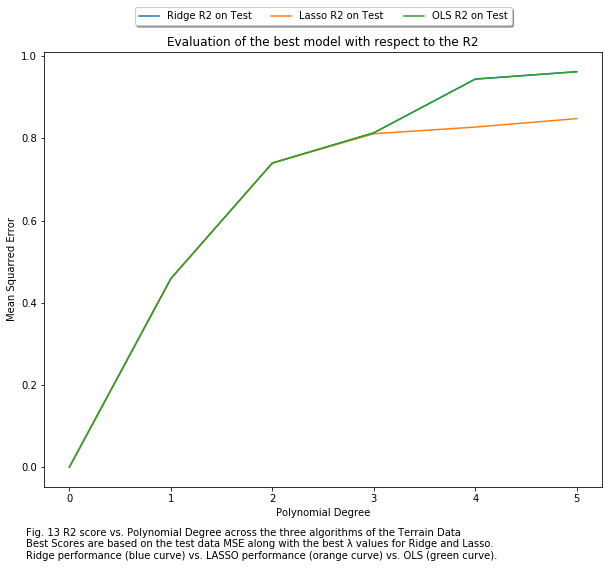

In [31]:
# ONLY PLOT THE BEST SCORES
# A plot is saying more than 1000 words could describe it - so let's describe what we see then: 
txt = 'Fig. 13 R2 score vs. Polynomial Degree across the three algorithms of the Terrain Data \nBest Scores are based on the test data MSE along with the best λ values for Ridge and Lasso.  \nRidge performance (blue curve) vs. LASSO performance (orange curve) vs. OLS (green curve).'
fig = plt.figure(figsize=(10, 8))

plt.plot(r2_lasso_test[:, 0], r2_ridge_test[:, ridge_col], label="Ridge R2 on Test")
plt.plot(r2_lasso_test[:, 0], r2_lasso_test[:, lasso_col], label="Lasso R2 on Test")
plt.plot(r2_lasso_test[:, 0], r2_OLS_test, label="OLS R2 on Test")

# for i, lamda in enumerate(lambda_to_test, 1):
#     plt.plot(mse_lasso_test[:, 0], mse_lasso_test[:, i], label= 'Test Regularization: ' + str(lamda))
    #plt.plot(mse_lasso_train[:, 0], mse_lasso_train[:, i], label= 'Train Regularization: ' + str(lamda))
    
plt.ylabel("Mean Squarred Error")
plt.xlabel("Polynomial Degree")
plt.legend(loc="upper left")
plt.title('Evaluation of the best model with respect to the R2')
plt.savefig(plot_dir + '\\terrain_models_r2.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.show()

Since the MSE, as well as the R2 scores for Ridge and OLS are almost the same, they overlap each other and it appears that only 2 curves are plotted. The blue Ridge curve is just hiding beneath it's slightly better performing brother of OLS. <br />
Below are the MSE and R2 score tables for the parametrization of $\lambda$ for Ridge and Lasso, respectively.

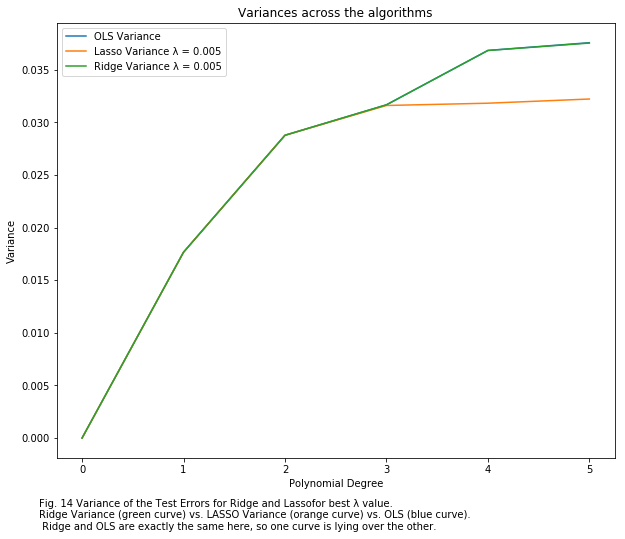

In [39]:
txt = 'Fig. 14 Variance of the Test Errors for Ridge and Lassofor best λ value. \nRidge Variance (green curve) vs. LASSO Variance (orange curve) vs. OLS (blue curve).\n Ridge and OLS are exactly the same here, so one curve is lying over the other.'
fig = plt.figure(figsize=(10, 8))

plt.plot(np.arange(max_poly_degree), OLS_var, label="OLS Variance")
plt.plot(np.arange(max_poly_degree), lasso_var[:, lasso_col-1], label="Lasso Variance λ = " + str(lambda_set[i]))
plt.plot(np.arange(max_poly_degree), ridge_var[:, ridge_col-1], label="Ridge Variance λ = " + str(lambda_set[i]))
plt.ylabel("Variance")
plt.title("Variances across the algorithms")
plt.xlabel("Polynomial Degree")
plt.legend(loc='upper left')
fig.text(0.1, 0, txt)
plt.show()


In [40]:
print("Lasso Variance")
print(tabulate([ [n,*i] for n,i in zip(np.arange(max_poly_degree), lasso_var)], headers=['Degree', *['Variance for λ: ' +str(i) for i in lambda_set]]))

Lasso Variance
  Degree    Variance for λ: 1e-07    Variance for λ: 8e-08    Variance for λ: 0.005
--------  -----------------------  -----------------------  -----------------------
       0               1.2326e-32               1.2326e-32               1.2326e-32
       1               0.0176526                0.0176526                0.00819476
       2               0.0287627                0.0287629                0.00966904
       3               0.0315934                0.0315941                0.00966903
       4               0.0318102                0.0318112                0.00966903
       5               0.0322077                0.0322084                0.00966903


In [42]:
#Plot the Variance
print("Ridge Variance")
print(tabulate([ [n,*i] for n,i in zip(np.arange(max_poly_degree), ridge_var)], headers=['Degree', *['Variance for λ: ' +str(i) for i in lambda_set]]))

Ridge Variance
  Degree    Variance for λ: 1e-07    Variance for λ: 8e-08    Variance for λ: 0.005
--------  -----------------------  -----------------------  -----------------------
       0               3.5622e-30              1.11242e-30              1.50993e-31
       1               0.0176528               0.0176528                0.0176528
       2               0.0287637               0.0287637                0.0287637
       3               0.0316556               0.0316556                0.0316555
       4               0.0368231               0.0368231                0.0368188
       5               0.0375594               0.0375594                0.0375235


In [43]:
if mse_ridge_test.shape[1] >= len(lambda_set): # not deleting more than the degree column
    mse_ridge_train = np.delete(mse_ridge_train, 0, 1)  # delete degree entry from array
    mse_ridge_test = np.delete(mse_ridge_test, 0, 1)  # delete degree entry from array
print("RIDGE MSE")
print(tabulate([ [n,*i, *j] for n,i,j in zip(np.arange(max_poly_degree), mse_ridge_test, mse_ridge_train)], headers=['Degree', 'Test λ: ' + str(lambda_set[0]), 'Test λ: ' + str(lambda_set[1]), 'Test λ: '+ str(lambda_set[2]), 'Train λ: '+ str(lambda_set[0]), 'Train λ: '+ str(lambda_set[1]), 'Train λ: '+ str(lambda_set[2])]))

RIDGE MSE
  Degree    Test λ: 1e-07    Test λ: 8e-08    Test λ: 0.005    Train λ: 1e-07    Train λ: 8e-08    Train λ: 0.005
--------  ---------------  ---------------  ---------------  ----------------  ----------------  ----------------
       0       0.038784         0.038784         0.038784          0.0388007         0.0388007         0.0388007
       1       0.0209869        0.0209869        0.0209869         0.0209711         0.0209711         0.0209711
       2       0.0100777        0.0100777        0.0100777         0.0100612         0.0100612         0.0100612
       3       0.00722453       0.00722453       0.00722453        0.00721546        0.00721546        0.00721546
       4       0.00215065       0.00215065       0.00215061        0.0021505         0.0021505         0.00215045
       5       0.00145079       0.00145079       0.0014504         0.00144743        0.00144743        0.0014474


In [44]:
if r2_ridge_test.shape[1] >= len(lambda_set): # not deleting more than the degree column
    r2_ridge_train = np.delete(r2_ridge_train, 0, 1)  # delete degree entry from array
    r2_ridge_test = np.delete(r2_ridge_test, 0, 1)  # delete degree entry from array
print("RIDGE R2")
print(tabulate([ [n,*i, *j] for n,i,j in zip(np.arange(max_poly_degree), r2_ridge_test, r2_ridge_train)], headers=['Degree', 'Test λ: ' + str(lambda_set[0]), 'Test λ: ' + str(lambda_set[1]), 'Test λ: '+ str(lambda_set[2]), 'Train λ: '+ str(lambda_set[0]), 'Train λ: '+ str(lambda_set[1]), 'Train λ: '+ str(lambda_set[2])]))

RIDGE R2
  Degree    Test λ: 1e-07    Test λ: 8e-08    Test λ: 0.005    Train λ: 1e-07    Train λ: 8e-08    Train λ: 0.005
--------  ---------------  ---------------  ---------------  ----------------  ----------------  ----------------
       0     -1.77043e-07     -1.77043e-07     -1.77044e-07      -1.36666e-07      -1.36666e-07      -1.36667e-07
       1      0.458876         0.458876         0.458876          0.459519          0.459519          0.459519
       2      0.740159         0.740159         0.740159          0.740696          0.740696          0.740696
       3      0.813724         0.813724         0.813724          0.814038          0.814038          0.814038
       4      0.944548         0.944548         0.944549          0.944576          0.944576          0.944577
       5      0.962593         0.962593         0.962603          0.962696          0.962696          0.962697


In [45]:
if mse_lasso_train.shape[1] >= len(lambda_set): # not shorten more than the degree column
    mse_lasso_train = np.delete(mse_lasso_train, 0, 1)  # delete degree entry from array
    mse_lasso_test = np.delete(mse_lasso_test, 0, 1)  # delete degree entry from array
print("LASSO MSE ")
print(tabulate([ [n,*i, *j] for n,i,j in zip(np.arange(max_poly_degree), mse_lasso_test, mse_lasso_train)], headers=['Degree', 'Test λ: ' + str(lambda_set[0]), 'Test λ: ' + str(lambda_set[1]), 'Test λ: '+ str(lambda_set[2]), 'Train λ: '+ str(lambda_set[0]), 'Train λ: '+ str(lambda_set[1]), 'Train λ: '+ str(lambda_set[2])]))

LASSO MSE 
  Degree    Test λ: 1e-07    Test λ: 8e-08    Test λ: 0.005    Train λ: 1e-07    Train λ: 8e-08    Train λ: 0.005
--------  ---------------  ---------------  ---------------  ----------------  ----------------  ----------------
       0       0.038784         0.038784          0.038784         0.0388007         0.0388007          0.0388007
       1       0.0209869        0.0209869         0.0231842        0.0209711         0.0209711          0.0231709
       2       0.0100777        0.0100777         0.0194501        0.0100612         0.0100612          0.0194432
       3       0.00730782       0.00730788        0.0194501        0.00729745        0.00729751         0.0194432
       4       0.00668069       0.00668061        0.0194501        0.00667091        0.00667083         0.0194432
       5       0.00588132       0.00588179        0.0194501        0.00587299        0.00587346         0.0194432


In [46]:
if r2_lasso_train.shape[1] >= len(lambda_set): # not shorten more than the degree column
    r2_lasso_train = np.delete(r2_lasso_train, 0, 1)  # delete degree entry from array
    r2_lasso_test = np.delete(r2_lasso_test, 0, 1)  # delete degree entry from array
print("LASSO R2")
print(tabulate([ [n,*i, *j] for n,i,j in zip(np.arange(max_poly_degree), r2_lasso_test, r2_lasso_train)], headers=['Degree', 'Test λ: ' + str(lambda_set[0]), 'Test λ: ' + str(lambda_set[1]), 'Test λ: '+ str(lambda_set[2]), 'Train λ: '+ str(lambda_set[0]), 'Train λ: '+ str(lambda_set[1]), 'Train λ: '+ str(lambda_set[2])]))

LASSO R2
  Degree    Test λ: 1e-07    Test λ: 8e-08    Test λ: 0.005    Train λ: 1e-07    Train λ: 8e-08    Train λ: 0.005
--------  ---------------  ---------------  ---------------  ----------------  ----------------  ----------------
       0     -1.77043e-07     -1.77043e-07     -1.77043e-07      -1.36666e-07      -1.36666e-07      -1.36666e-07
       1      0.458876         0.458876         0.402222          0.459519          0.459519          0.402823
       2      0.740159         0.740159         0.498501          0.740696          0.740696          0.498896
       3      0.811576         0.811575         0.498501          0.811925          0.811923          0.498896
       4      0.827746         0.827748         0.498501          0.828072          0.828075          0.498896
       5      0.848357         0.848345         0.498501          0.848637          0.848625          0.498896


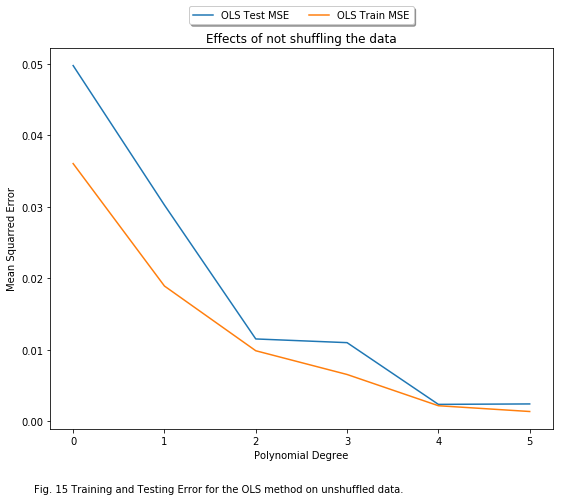

In [47]:
# values taken from a run where shuffling was disabled
error = np.array(([0, 0.049777, 0.0360533],[1, 0.0302424, 0.0189076],[2, 0.0115005, 0.00984781],[3, 0.0109817, 0.0065235], [4, 0.00233881, 0.00214977], [5, 0.00240135, 0.00134142]))
txt = 'Fig. 15 Training and Testing Error for the OLS method on unshuffled data.'
fig = plt.figure(figsize=(9,7))
plt.plot(error[:, 0], error[:, 1], label="OLS Test MSE")
plt.plot(error[:, 0], error[:, 2], label="OLS Train MSE")
plt.ylabel("Mean Squarred Error")
plt.xlabel("Polynomial Degree")
plt.legend(loc="upper left")
plt.title('Effects of not shuffling the data')
plt.savefig(plot_dir + '\\terrain_models_unshuffledOLS.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.show()

NON SHUFFLED RIDGE


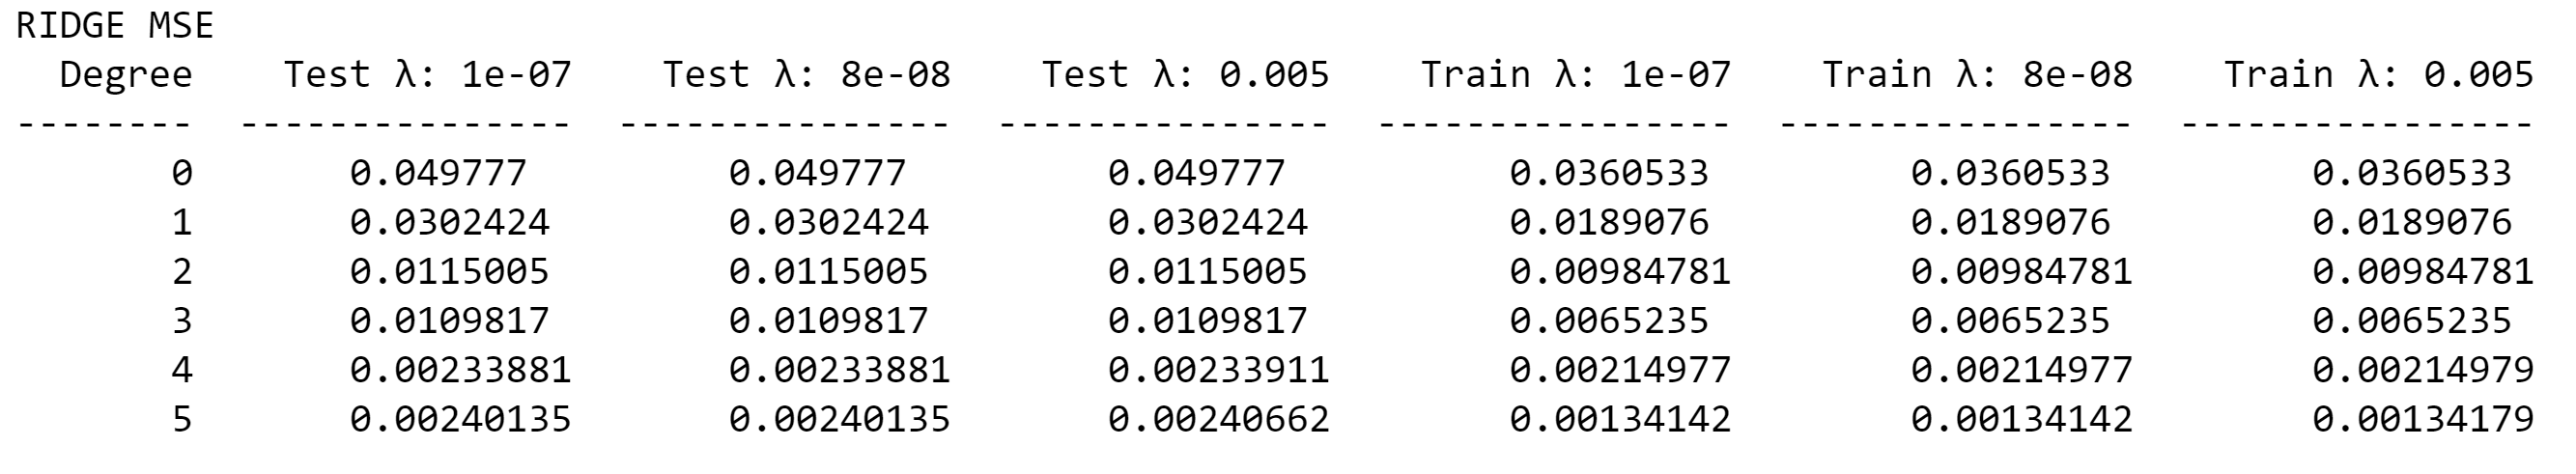

In [48]:
print("NON SHUFFLED RIDGE")
Image(filename='plots/ridge_terrain_noShuffle.PNG')

NON SHUFFLED OLS


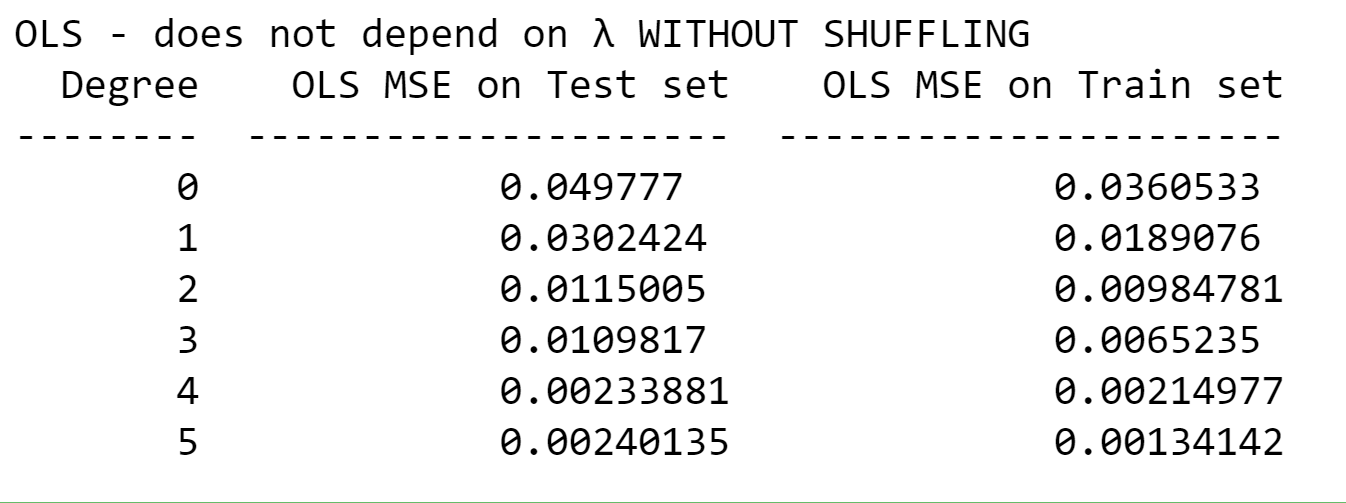

In [49]:
print("NON SHUFFLED OLS")
Image(filename='plots/no_shuffle_terrain_OLS.PNG')

NON SHUFFLED LASSO MSE


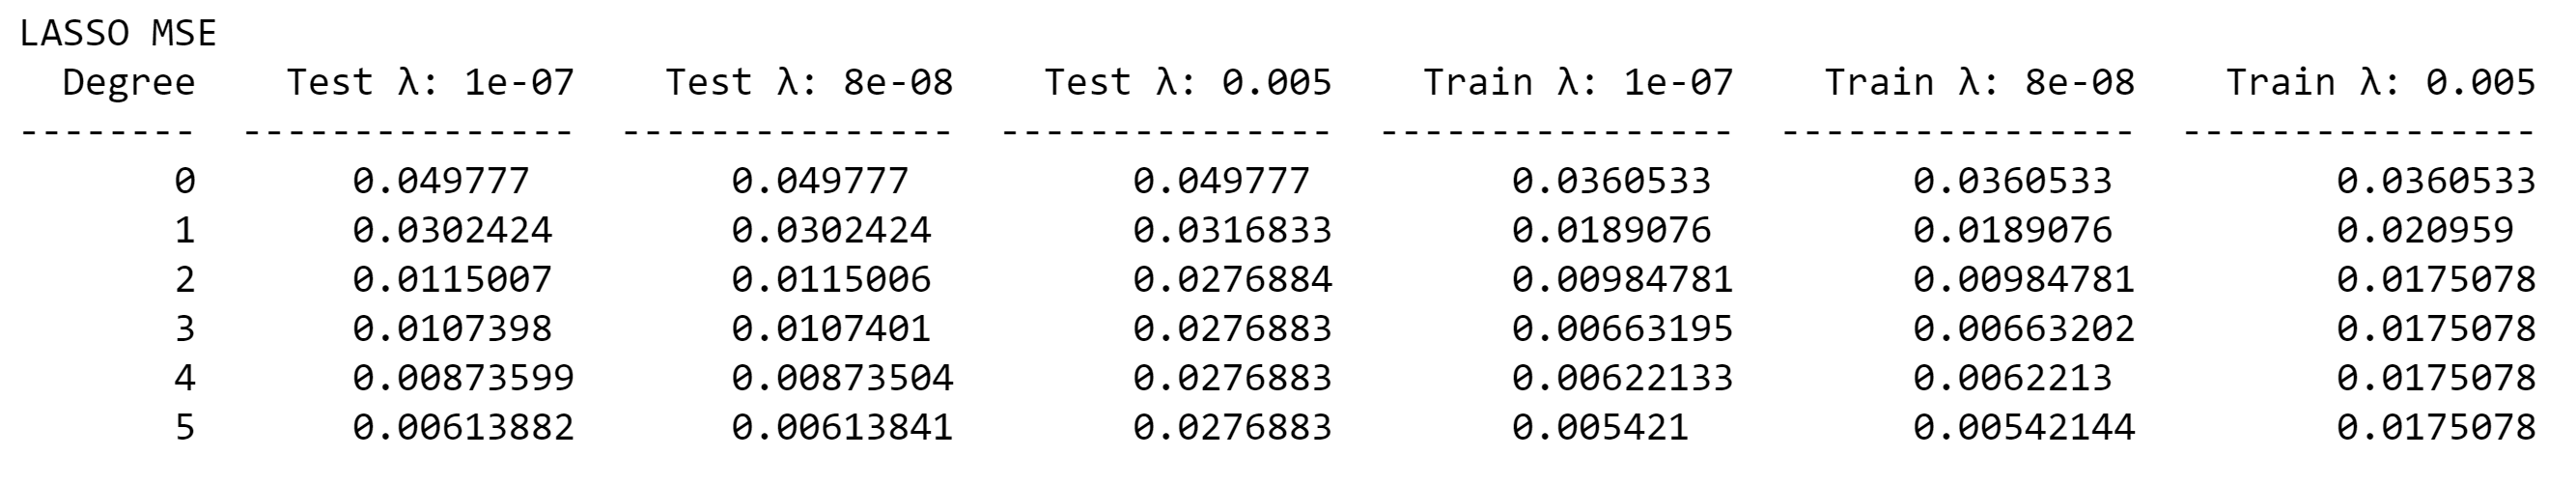

In [50]:
print("NON SHUFFLED LASSO MSE")
Image(filename='plots/lasso_mse_noShuffle.PNG')

Comparing the suffled with the non shuffled Test errors across each algorihtm it is easy to see that the test errors are higher. <br /> 
This is due to the implemented train_test_split. Since taking the last 20% as test set, the terrain data at the end will never been seen during training, thus these essential datapoints are missing during training. <br />
Looking at Fig. 11 and Fig. 10, where the terrain area is plotted with respect to its altitude, it is trivial to see that the highest points are in occuring in the far back of the picture, especially true for the evaluated Møsvatn Austfjell area (Fig. 11). <br /> 
Hence, taking the last 20% as test set, the high areas are not being learned and the classifier somehow learns a spatial correlation of the data (since there are no high values during the training process or only some, which will be penalized by the regularization methods). <br /> 
Note, deciding o a bigger test set of 33%, the effects of that would have been even bigger, since less "high" datapoints would have been drafted to the training dataset. There the previously mentioned overfitting could play a role, when the training and test error start to diverge. <br />

To sum it up, know your data. Since we could visualize the topology data we can see that the Møsvatn Austfjell area is kind of linearly increasing in altitude towards the end. This counts to counteract by mixing the data before splitting it into train and test set. 

## 4.) Analysis

Considering that all three regression algorithms implemented in the previous chapter 3.) Code and Implementation had the same Training and Testing data, we further can compare all testing scores acorss the algorithms. <br />
Please note, that only tested several different regularization parameters were tested. Attached in the Appendix (at the very end) you can find the MSE and R2 scores for different $\lambda$ parametrizations acorss the algorihtms. However, each of the tested parameter still does not beat the vanilla OLS method. <br /> 
Furthermore, the ordinary Least Squares method achieved slightly better scores than its derivation Ridge regression and outperformed Lasso Regression. <br /> 
Nonetheless, Ridge regression still had a comparably good performance with respect to the terrain data for low $\lambda$ values, but Lasso was worse than the other both. <br />
The higher the $\lambda$ values (see Appendix for $\lambda \geq 10$), the worse the performance of Ridge and Lasso respectively that's why the focus is on smaller $\lambda$ values. <br /> 
Having more computation power at hand, one can still do an optimal hyperparameter search for $\lambda$ by using cross validation or random search. <br />
Additionally, there is a positive correlation among the polynomial degree and the Error measurement: the higher the polynomial degree, the smaller the MSE or the higher the R2 score, respectively. <br /> 
Comparing the scores with the generated Franke function data, we could observe similiar behavior for the algorithms. Ridge and OLS can basically achieve same scores on both datasets unlike Lasso. Lasso was always worse than both methods, sometimes even significant deviations between Lasso and the other two types. <br />

Moreover, by shuffling the data one could ameliorate the model performance from 0.00238 to 0.00145 (values taken from Appendix). <br /> 
Nevertheless, a MSE of 0.00238 is already pretty good, but by enabling data shuffling it is possible to achieve an about 50% better score of the model with no real effort. <br />

## 5.) Conclusions

In the present work, three regression algorithms have been benchmarked on accuracy for real-valued functions of two variables. <br />
One, the Franke function to familiarize with the regression methods at hand, and secondly topologically terrain data of a Norwegian region. <br /> 
Both datasets revealed similiar outcomes for the Regression problem. The ordinary least squares (OLS) method yields similiar results to the regularized Ridge regression (with a low $\lambda$ parametrization). Lasso regression technique performed worse than its "siblings" with several tested $\lambda$ values. <br />
Since OLS is not depending on $\lambda$, it is the preferrably choice for both datasets due to time and computation savings because there is no need in finding the optimal regularization parameter $\lambda$. <br />

One reason why the OLS method is achieving great scores, is due to the fact that the model is in a bias-dominated region of the MSE, where the variance hardly matters at all for the overall error (there is barely any variance - see Fig. 14). <br />
Since the regularization methods are variance-reducing schemes, the error is not that much affected of the regularization and thus, yielding OLS as the Usain Bolt of the Regression methods for this dataset. <br />

## 6.) Further Work 

Since this project did only run some common and basic Regression methods, one could benchmark the performance to a state-of-the-art Neural Network and see its performance on the terrain data. However, since the terrain data does not have so many predictors and thus is not as complex as volatile stock market movements, it may even yield worse results, but anyway interesting to see how methods from hundreds of years back (OLS) cope with more modern regression versions for simple tasks. <br /> 
Additionally, to further scrutinize the effects of $\lambda$ on Ridge and Lasso it would be nice to see some more parametrizations to find the real sweet spot for both methods, especially if the models starts to have bigger variances and then compare it against OLS. Therefore, it is necessary to have more predictor variables to end up in higher dimensional data, such as stock market data, and perform a Regression on this dataset with higher variances. <br />

## References

[1] EarthExplorer website: https://earthexplorer.usgs.gov/, Used Dataset: Norway, last visited 05.09.2019 <br />
[2] Bishop, C.M. et al. (2011). *Pattern Recognition and Machine Learning*. Cambridge: Springer. <br />
[3] Duda, R. O. et al. (2007). *Pattern Classification*. San Jose: Wiley. <br />
[4] Murphy, K. P. et al. (2007). *Machine Learning: A probabilistic Perspective*. Camebridge: MIT Press. <br />
[5] Knoll, A. (2019). *Cognitive Systems*. Lecture hold at Technical University Munich (TUM), [Source](https://github.com/lenlehm/Regression-and-Resampling/blob/master/E02-Machine_Learning.pdf) included in Github Repository <br />
[6] Hjorth-Jensen, M. (2019). *Regression*. Lecture hold at University of Oslo (UiO), [Source](https://compphysics.github.io/MachineLearning/doc/web/course.html) <br />
[7] Hastie, T. et al. (2009). *The Elements of Statistical Learning*. Camebridge: Springer <br />

## Appendix

Some more plots for the terrain data $\lambda$ parametrization. <br /> 
All of the plots below are showing the Mean Squared Error (MSE) of Ridge or Lasso, respectively.


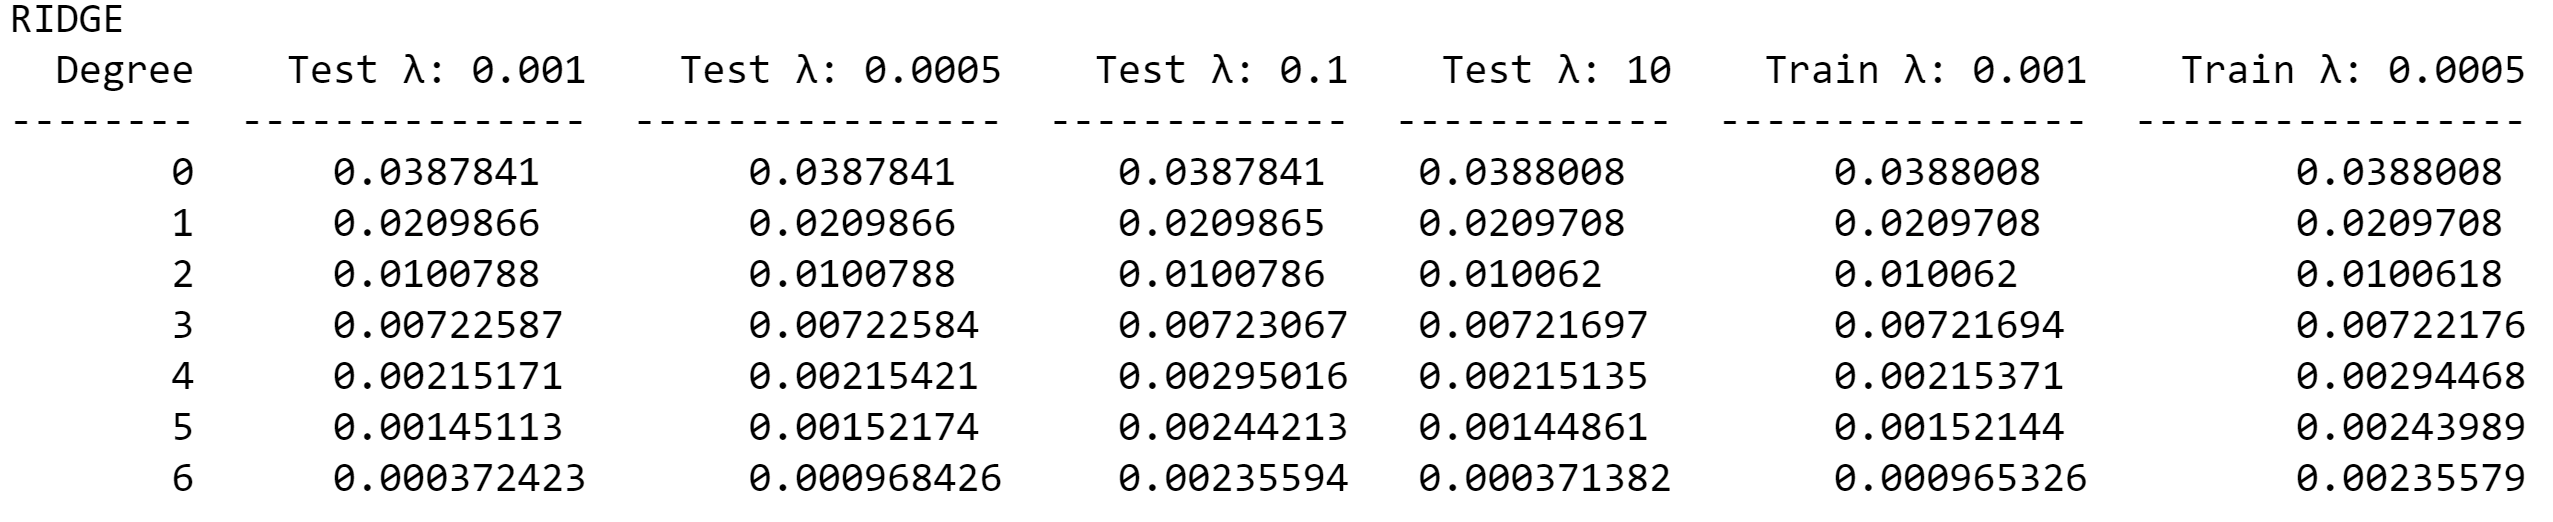

In [61]:
Image(filename='plots/Ridge_.PNG')

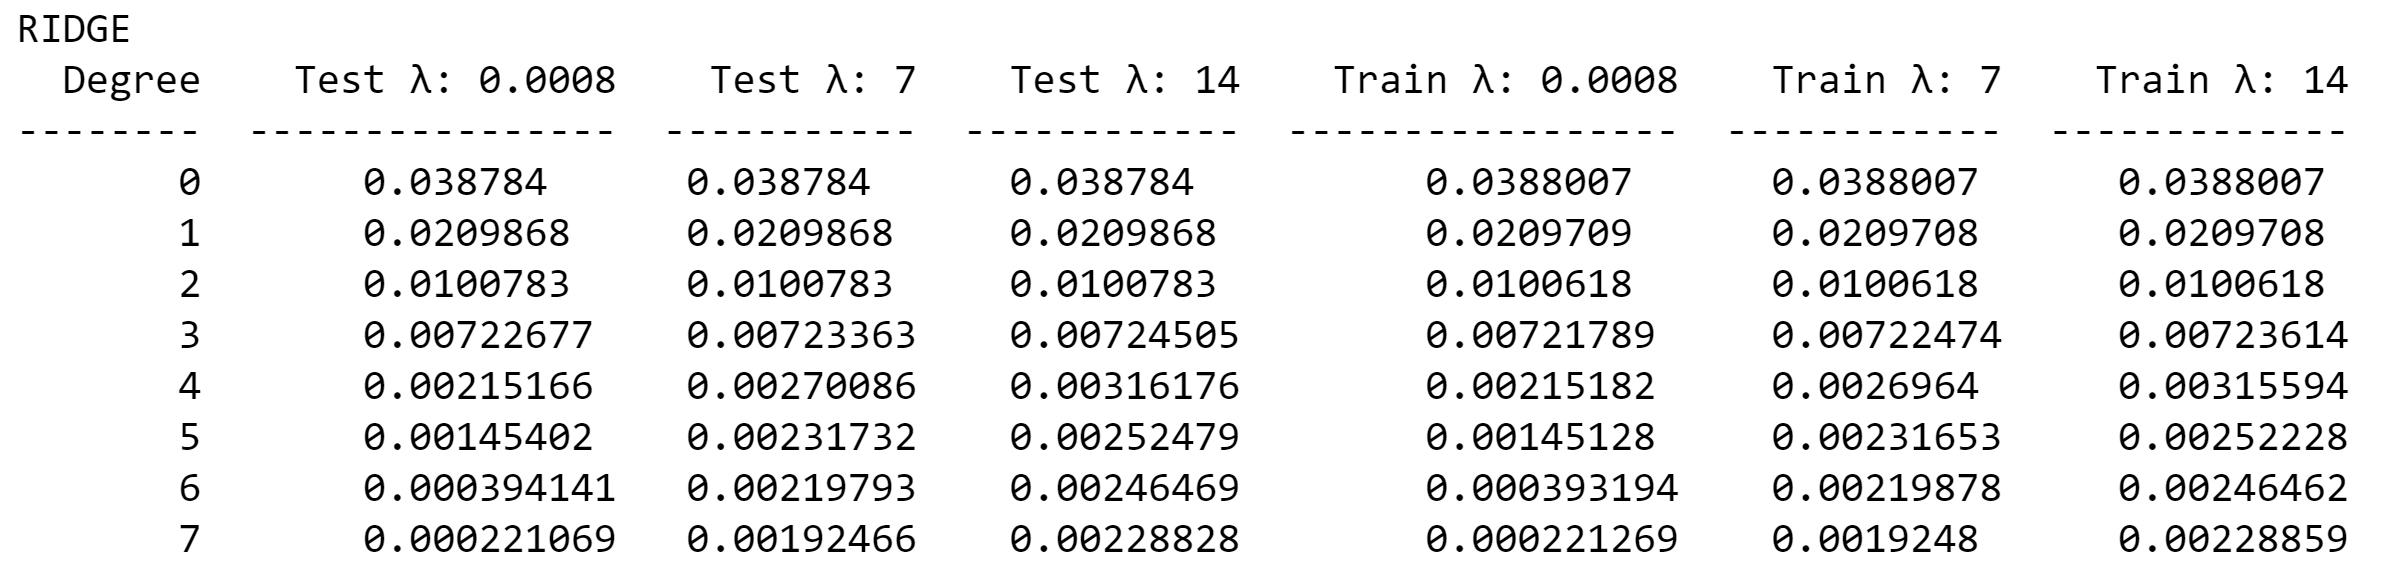

In [62]:
Image(filename='plots/ridge_2.PNG')

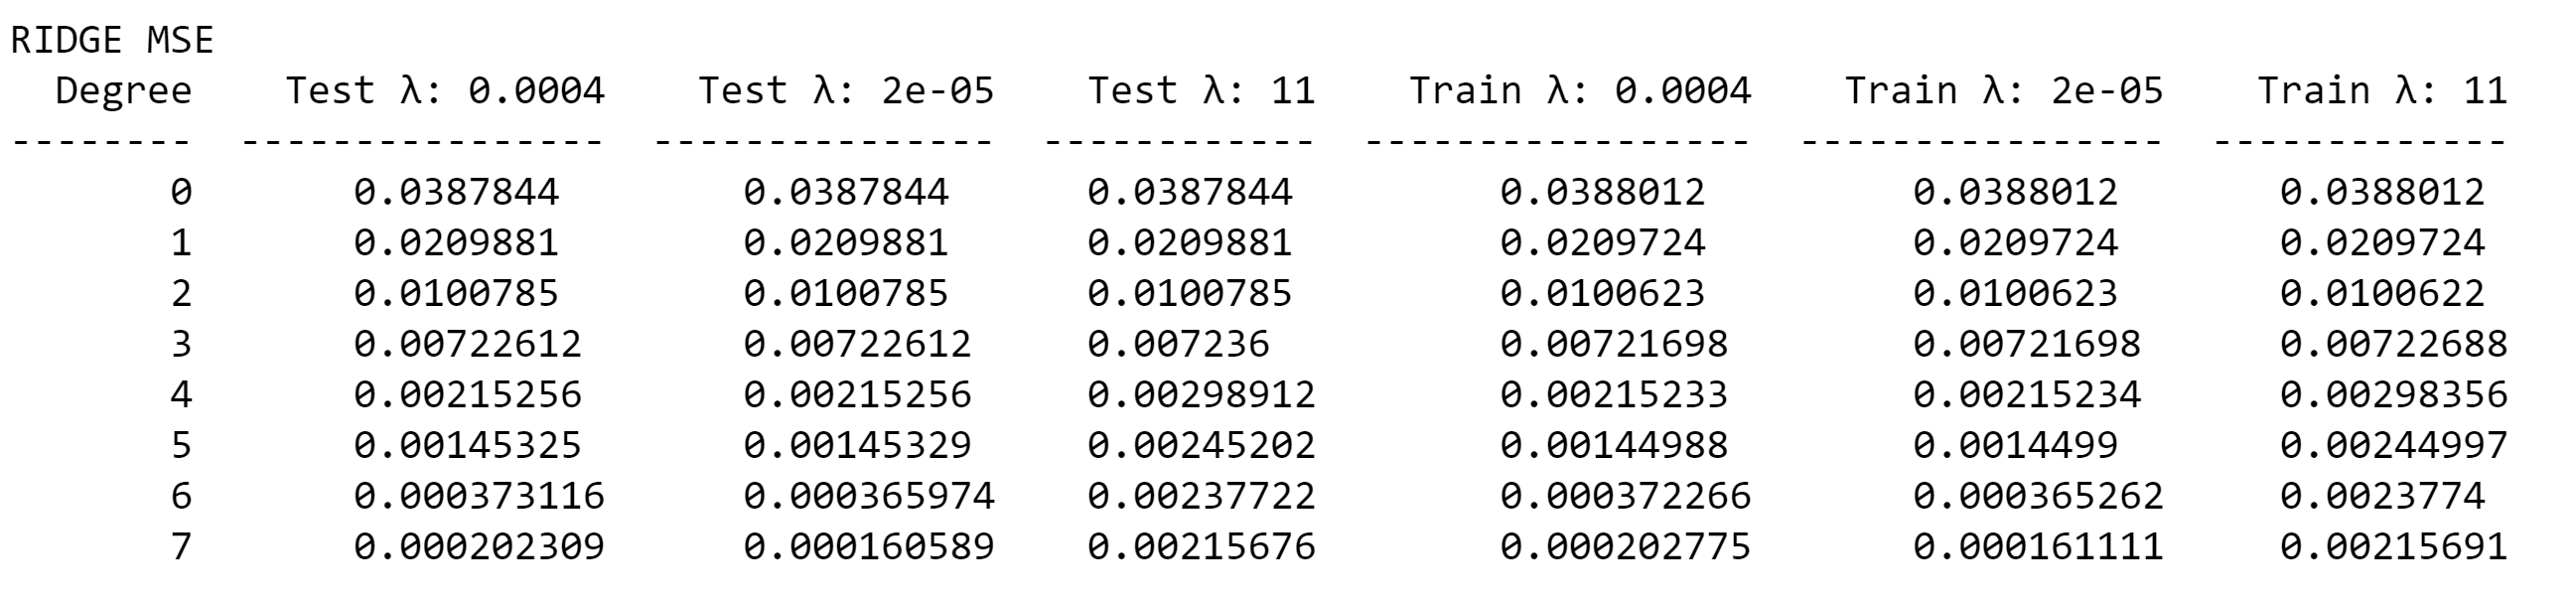

In [63]:
Image(filename='plots/ridge3.PNG')

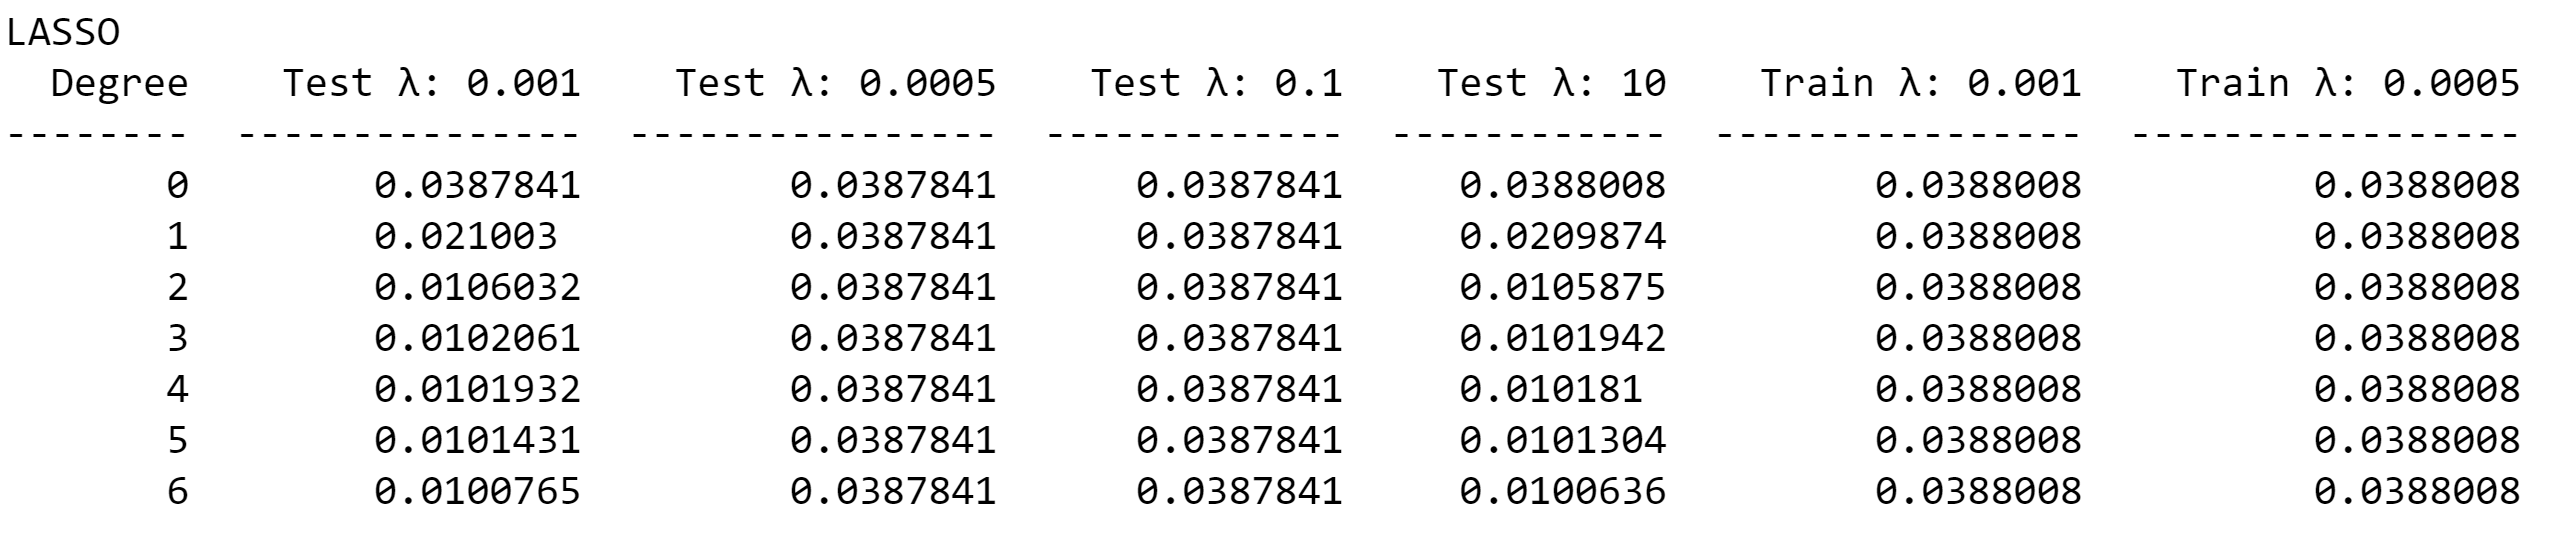

In [64]:
Image(filename='plots/lasso_.PNG')

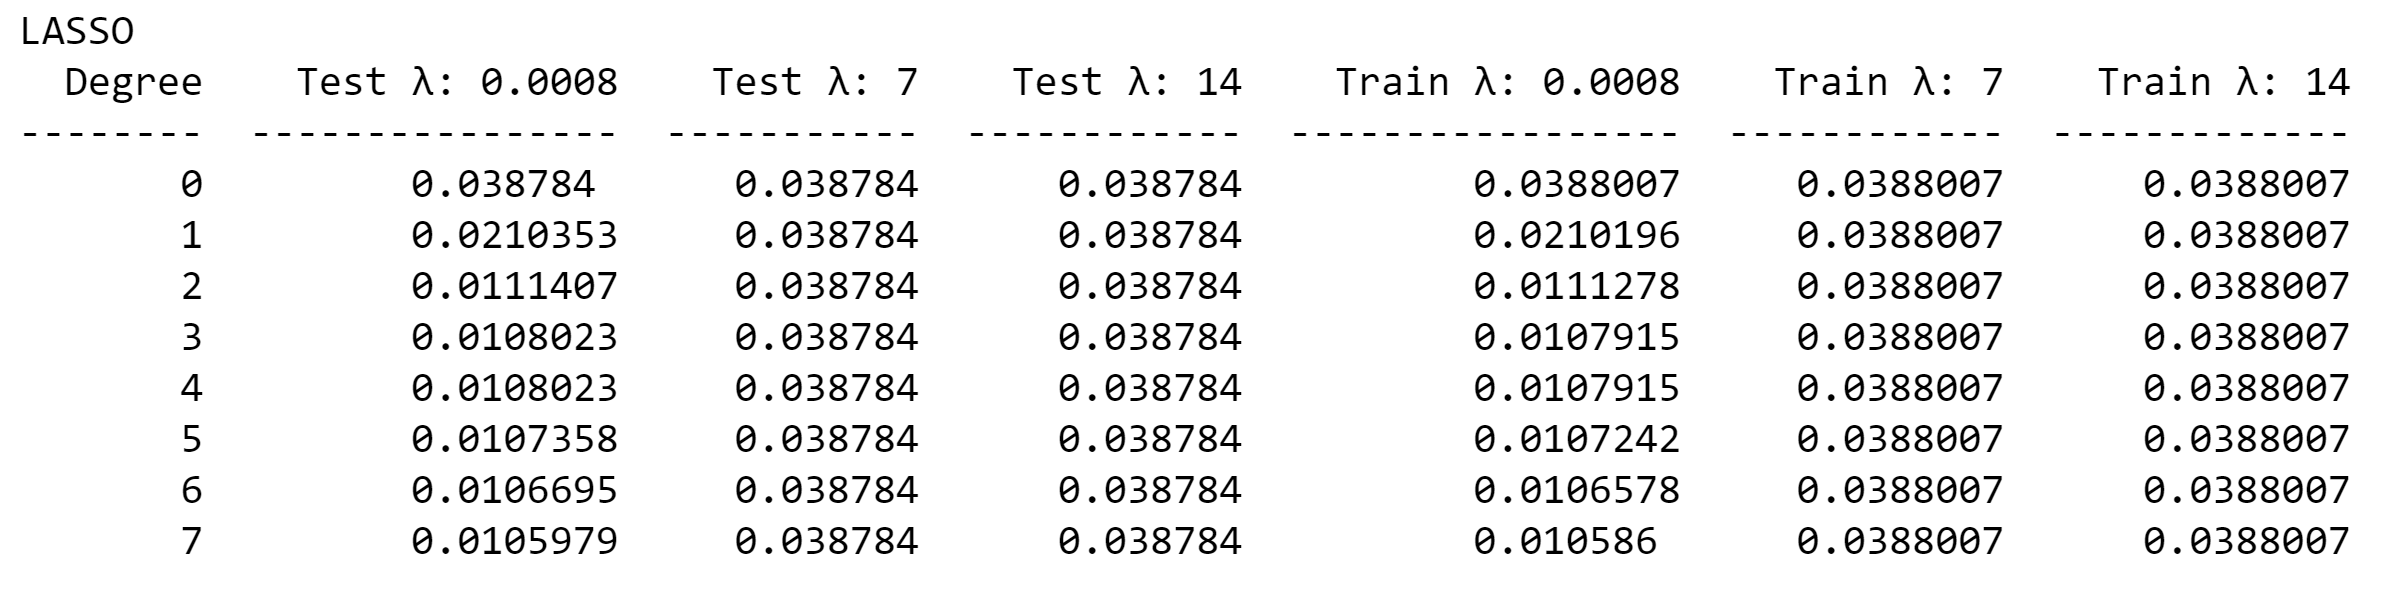

In [65]:
Image(filename='plots/lasso_2.PNG')

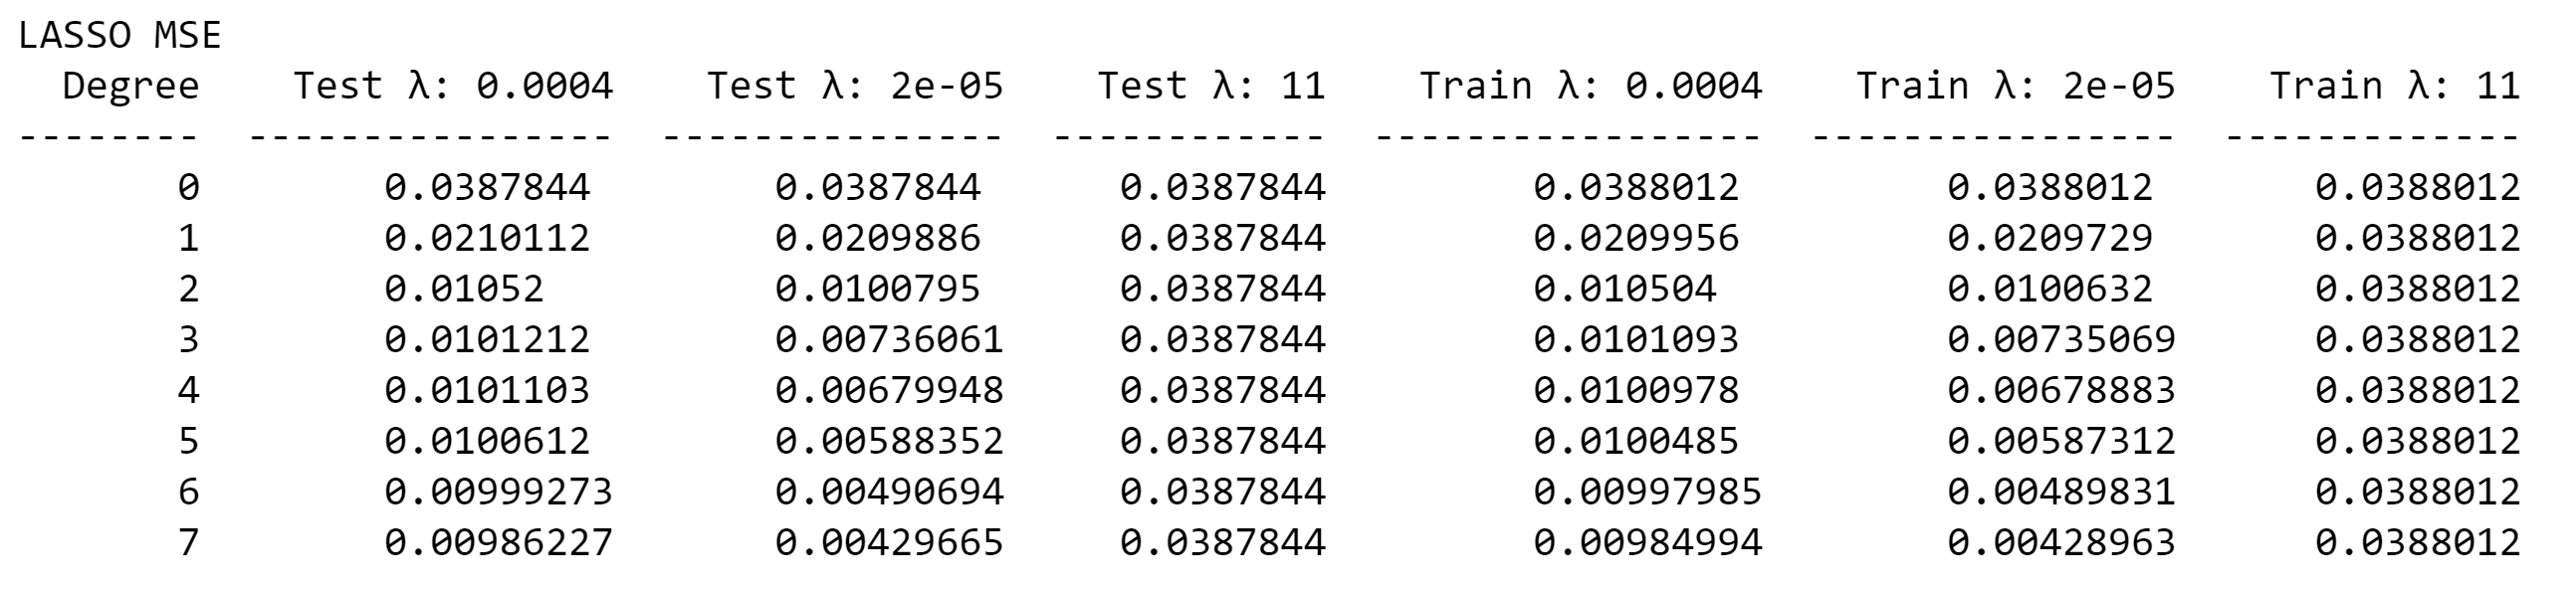

In [66]:
Image(filename='plots/lasso3.PNG')

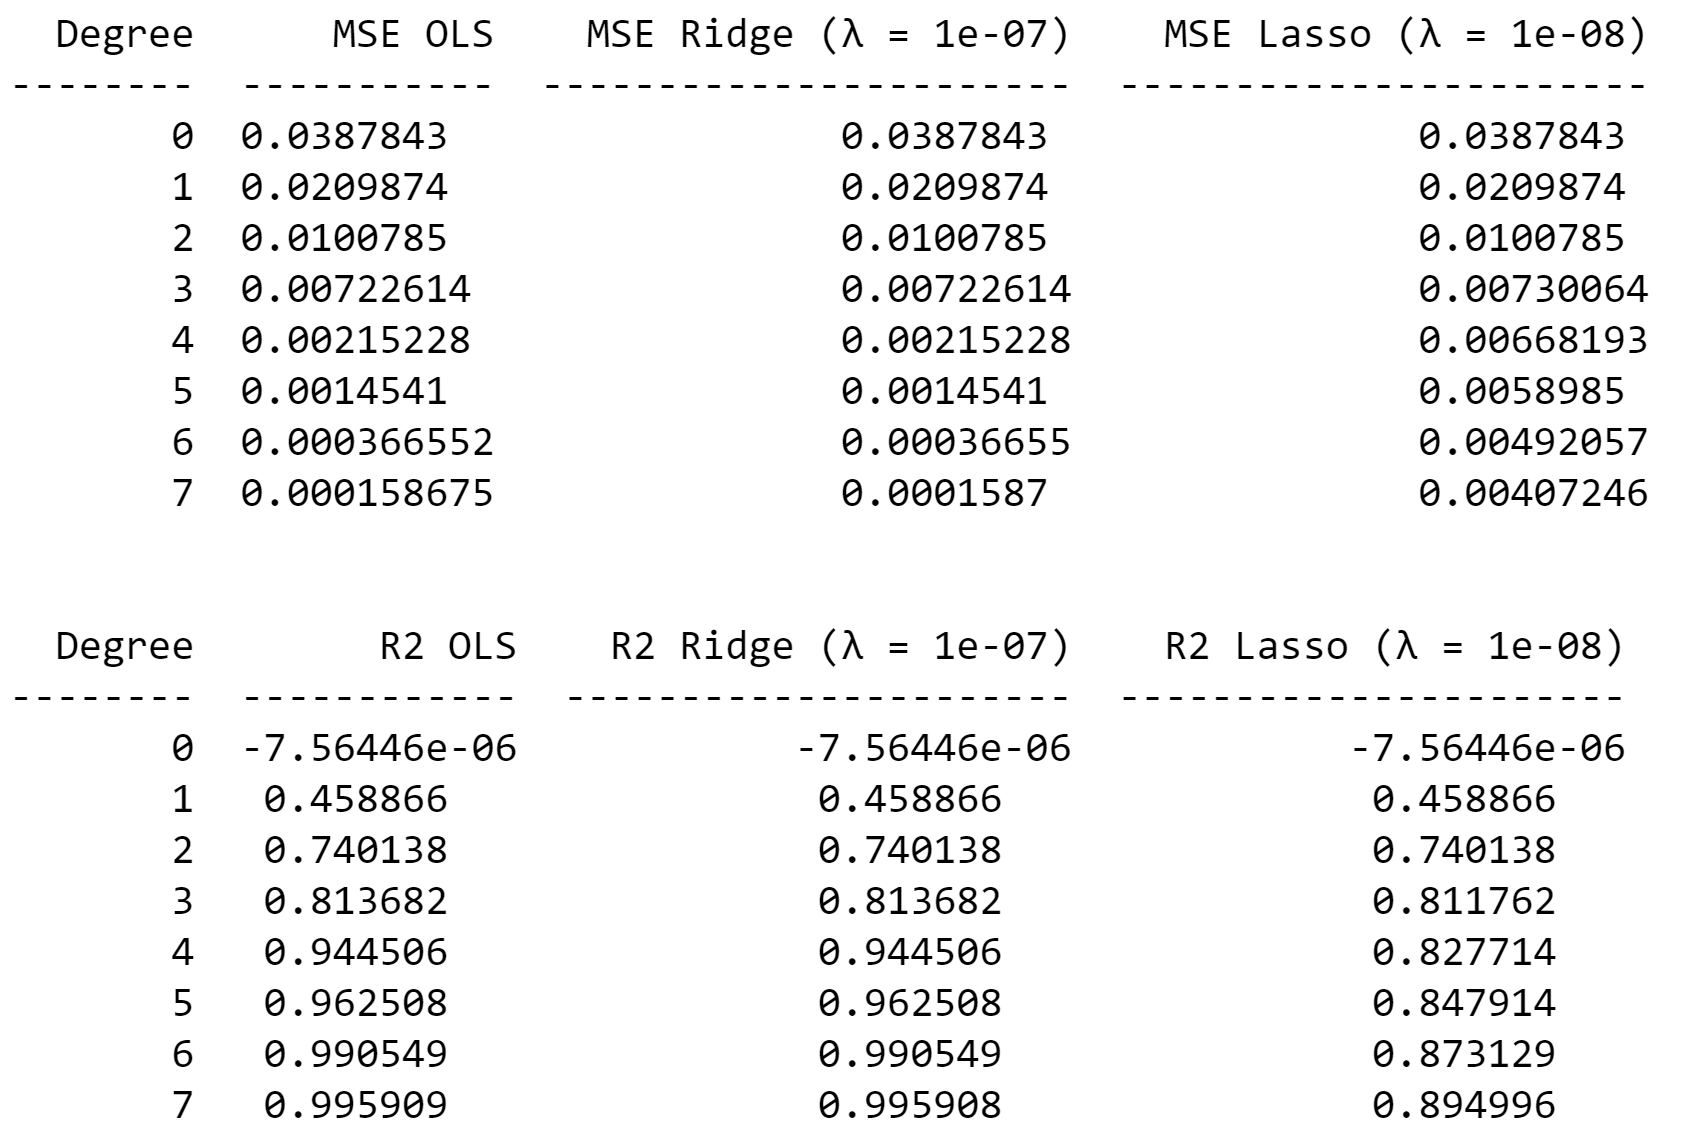

In [67]:
Image(filename='plots/terrain_test_scores_shuffling.PNG')

In [ ]:
z